# Auswertung

## Imports und globale Einstellungen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import math
from geopy import distance

In [2]:
plt.style.use("masterarbeit.mplstyle")

# Höher auflösende Karte für die Ländergrenzen
map_df = gpd.read_file("ne_50m_admin_0_countries.shx") # https://www.naturalearthdata.com/downloads/50m-cultural-vectors/ Ich brauche sowohl .shp als auch .shx!

In [3]:
df_space = pd.read_json("http://localhost:8080/exist/apps/API/view-json.xql?entityType=space")
df_books = pd.read_json("http://localhost:8080/exist/apps/API/view-json.xql?entityType=books")
df_persons = pd.read_json("http://localhost:8080/exist/apps/API/view-json.xql?entityType=persons")
df_places = pd.read_json("http://localhost:8080/exist/apps/API/view-json.xql?entityType=places")
df_organisations = pd.read_json("http://localhost:8080/exist/apps/API/view-json.xql?entityType=organisations")


df_books.set_index("id", inplace=True)
df_persons.set_index("id", inplace=True)
df_places.set_index("id", inplace=True)
df_organisations.set_index("id", inplace=True)

## Ansicht reiner Dataframes

In [4]:
df_books

m_id  s_id authoren_ids sprachen erscheinungsorte_ids  \
id                                                                    
m_00001_a  m_00001  None         None      lat             pl_00001   
m_00002_a  m_00002  None         None      lat             pl_00001   
m_00003_a  m_00003  None         None      lat                 None   
m_00004_a  m_00004  None         None      lat             pl_00002   
m_00005_a  m_00005  None         None      lat             pl_00003   
...            ...   ...          ...      ...                  ...   
m_03977_a  m_03977  None         None      lat             pl_00221   
m_03980_a  m_03980  None     pe_00692      lat             pl_00002   
m_03985_a  m_03985  None         None      deu             pl_00012   
m_03991_a  m_03991  None     pe_00311      deu             pl_00002   
m_03991_b  m_03991  None     pe_00311      deu             pl_00002   

           erscheinungsjahr  format        kategorie  später_hinzugefügt  \
id                                                                         
m_00001_a            1525.0     2.0  Sacra Scriptura                   0   
m_00002_a            1526.0     2.0  Sacra Scriptura                   0   
m_00003_a               NaN     2.0  Sacra Scriptura                   0   
m_00004_a            1527.0     2.0  Sacra Scriptura                   0   
m_00005_a            1540.0     2.0  Sacra Scriptura                   0   
...                     ...     ...              ...                 ...   
m_03977_a            1786.0     8.0         Theologi                   1   
m_03980_a            1548.0     8.0   Controversistæ                   0   
m_03985_a            1700.0     4.0    Concionatores                   0   
m_03991_a            1660.0     4.0    Concionatores                   0   
m_03991_b            1661.0     4.0    Concionatores                   0   

           später_entfernt  
id                          
m_00001_a                0  
m_00002_a                0  
m_00003_a                0  
m_00004_a                0  
m_00005_a                0  
...                    ...  
m_03977_a                0  
m_03980_a                0  
m_03985_a                0  
m_03991_a                0  
m_03991_b                0  

[5271 rows x 10 columns]

In [5]:
df_persons

name geschlecht geburtsort_id  geburtsjahr_min  \
id                                                                          
pe_00001            Jean Benoît          m      pl_00024           1484.0   
pe_00002    Johann Dietenberger          m      pl_00015           1475.0   
pe_00003  Thomas Aquinas Erhard          m      pl_00033           1675.0   
pe_00004       Germanus Cartier          m          None           1690.0   
pe_00005          Hermann Demen          m          None           1636.0   
...                         ...        ...           ...              ...   
pe_01611    Michiel Zachmoorter          m          None           1582.0   
pe_01613       Jacopo Sannazaro          m      pl_00045           1456.0   
pe_01615    Christian Hipparius       None          None              NaN   
pe_01617       Martino Bonacina          m      pl_00044           1585.0   
pe_01619    Christophe Pasturel       None          None           1585.0   

          geburtsjahr_max sterbeort_id  sterbejahr_min  sterbejahr_max  \
id                                                                       
pe_00001           1484.0     pl_00004          1573.0          1573.0   
pe_00002           1475.0     pl_00009          1537.0          1537.0   
pe_00003           1675.0     pl_00033          1743.0          1743.0   
pe_00004           1690.0         None          1749.0          1749.0   
pe_00005           1636.0         None          1710.0          1710.0   
...                   ...          ...             ...             ...   
pe_01611           1582.0     pl_00013          1660.0          1660.0   
pe_01613           1456.0     pl_00045          1530.0          1530.0   
pe_01615              NaN         None             NaN             NaN   
pe_01617           1585.0     pl_00011          1631.0          1631.0   
pe_01619           1585.0         None          1649.0          1649.0   

         organisation_id                      glaube  
id                                                    
pe_00001            None  römisch-katholische Kirche  
pe_00002       org_00006  römisch-katholische Kirche  
pe_00003       org_00003                        None  
pe_00004       org_00003                        None  
pe_00005            None                        None  
...                  ...                         ...  
pe_01611            None                        None  
pe_01613            None                        None  
pe_01615            None                        None  
pe_01617            None                        None  
pe_01619       org_00027                        None  

[1513 rows x 10 columns]

In [6]:
df_places = df_places.replace("Bundesrepublik Deutschland", "Deutschland")
df_places

name  koordinaten_lat  koordinaten_lon         land
id                                                                 
pl_00001        Lyon         45.74846          4.84671   Frankreich
pl_00002        Köln         50.93333          6.95000  Deutschland
pl_00003   Antwerpen         51.22047          4.40026      Belgien
pl_00004       Paris         48.85341          2.34880   Frankreich
pl_00005    Würzburg         49.79391          9.95121  Deutschland
...              ...              ...              ...          ...
pl_01021  Gardelegen         52.52635         11.39975  Deutschland
pl_01022  Volkmarsen         51.40340          9.11010  Deutschland
pl_01023     Belluno         46.14941         12.21610      Italien
pl_01024     Cassino         41.48762         13.83151      Italien
pl_01025    Vercelli         45.32306          8.41533      Italien

[930 rows x 4 columns]

In [7]:
df_organisations

name
id                                                          
org_00003                                       Benediktiner
org_00005                                        Oratorianer
org_00006                                        Dominikaner
org_00007                                           Jesuiten
org_00008                                Augustiner-Eremiten
org_00010                                       Franziskaner
org_00011                                          Kapuziner
org_00012                           Franziskaner-Rekollekten
org_00020                                          Minoriten
org_00027                                         Karmeliten
org_00026                             Augustiner-Rekollekten
org_00034                              Augustiner-Chorherren
org_00009                             Unbeschuhte Karmeliten
org_00015                                      Zisterzienser
org_00016                                         Kartäuser
org_00017          Augustiner-Chorherren vom Heiligen Victor
org_00018                                         Augustiner
org_00019                                         Barnabiten
org_00028  Ordre de la bienheureuse Vierge Marie du Mont ...
org_00029                                          Theatiner
org_00039                                   Trinitarierorden
org_00040                                       Hieronymiten
org_00041                               Augustiner-Barfüßer
org_00043                                  Franziskanerinnen
org_00044                                 Konzeptionistinnen
org_00045                                    Cölestinerinnen
org_00047                                        Feuillanten
org_00053                                        Observanten
org_00056                           Französisches Oratorium
org_00059                                      Kamaldulenser
org_00061  Augustinerchorherren. Lateranensische Kongrega...
org_00062                                       Doktrinarier
org_00064         Ordo Fratris Menoris Regularis Observantia
org_00087                                  Prämonstratenser
org_00091                        Basilianer des hl. Josaphat
org_00093                                            Minimen
org_00096                                    Deutscher Orden

## Space

In [8]:
df_space_grouped = df_space.groupby(by=["kategorie"]).sum()

In [9]:
seitenzahl_pro_kategorie = {"Sacra Scriptura": 10, "Sancti Patres": 6, "Scriptores Ecclesiastici": 4, "Scriptores Ordinum Religiosorum": 8, "Expositores Sacræ Scripturæ": 12, "Libri Ascetici": 32, "Canonistæ": 14, "Concilia & Canones": 6, "Theologi": 32, "Controversistæ": 26, "Philosophi": 10, "Juristæ": 12, "Concionatores": 60, "Catechistæ": 3, "Libri Infirmorum": 2, "Libri Exorcismorum": 1, "Historici Sacri": 7, "Historici Profani": 12, "Miscellanei": 12, "Rhetores": 6, "Pöetæ": 6, "Libri Gallici": 8, "Libri Italici, Hispanici & Belgici &c.": 11}
df_space_grouped["Seitenanzahl"] = pd.Series(seitenzahl_pro_kategorie)
df_space_grouped = df_space_grouped.sort_values(by="space_in_mm", ascending=False)
df_space_grouped

space_in_mm  Seitenanzahl
kategorie                                                        
Concionatores                                 10748            60
Theologi                                       5913            32
Libri Ascetici                                 5595            32
Controversistæ                                 5167            26
Canonistæ                                      2568            14
Juristæ                                        2055            12
Philosophi                                     1966            10
Miscellanei                                    1917            12
Libri Italici, Hispanici & Belgici &c.         1903            11
Historici Profani                              1899            12
Expositores Sacræ Scripturæ                    1602            12
Libri Gallici                                  1366             8
Sacra Scriptura                                1355            10
Historici Sacri                                1213             7
Pöetæ                                          1164             6
Concilia & Canones                             1056             6
Rhetores                                        986             6
Scriptores Ordinum Religiosorum                 777             8
Sancti Patres                                   699             6
Scriptores Ecclesiastici                        548             4
Catechistæ                                      471             3
Libri Infirmorum                                378             2
Libri Exorcismorum                              192             1

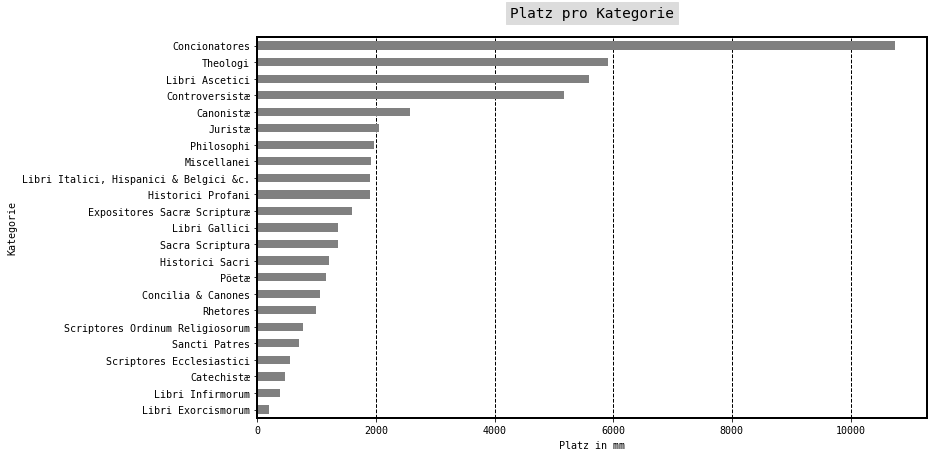

In [10]:
df_space_grouped = df_space_grouped.sort_values(by="space_in_mm", ascending=True)
df_space_grouped.space_in_mm.plot(kind="barh", figsize=(12,7))
plt.title("Platz pro Kategorie", backgroundcolor="gainsboro")
plt.ylabel("Kategorie")
plt.xlabel("Platz in mm")
plt.grid(axis="x")
plt.show()

In [11]:
df_space_grouped["Durchschnitt"] = df_space_grouped["space_in_mm"].div(df_space_grouped["Seitenanzahl"])
df_space_grouped = df_space_grouped.sort_values(by="Durchschnitt")
df_space_grouped

space_in_mm  Seitenanzahl  \
kategorie                                                           
Scriptores Ordinum Religiosorum                 777             8   
Sancti Patres                                   699             6   
Expositores Sacræ Scripturæ                    1602            12   
Sacra Scriptura                                1355            10   
Scriptores Ecclesiastici                        548             4   
Catechistæ                                      471             3   
Historici Profani                              1899            12   
Miscellanei                                    1917            12   
Rhetores                                        986             6   
Libri Gallici                                  1366             8   
Juristæ                                        2055            12   
Libri Italici, Hispanici & Belgici &c.         1903            11   
Historici Sacri                                1213             7   
Libri Ascetici                                 5595            32   
Concilia & Canones                             1056             6   
Concionatores                                 10748            60   
Canonistæ                                      2568            14   
Theologi                                       5913            32   
Libri Infirmorum                                378             2   
Libri Exorcismorum                              192             1   
Pöetæ                                          1164             6   
Philosophi                                     1966            10   
Controversistæ                                 5167            26   

                                        Durchschnitt  
kategorie                                             
Scriptores Ordinum Religiosorum            97.125000  
Sancti Patres                             116.500000  
Expositores Sacræ Scripturæ               133.500000  
Sacra Scriptura                           135.500000  
Scriptores Ecclesiastici                  137.000000  
Catechistæ                                157.000000  
Historici Profani                         158.250000  
Miscellanei                               159.750000  
Rhetores                                  164.333333  
Libri Gallici                             170.750000  
Juristæ                                   171.250000  
Libri Italici, Hispanici & Belgici &c.    173.000000  
Historici Sacri                           173.285714  
Libri Ascetici                            174.843750  
Concilia & Canones                        176.000000  
Concionatores                             179.133333  
Canonistæ                                 183.428571  
Theologi                                  184.781250  
Libri Infirmorum                          189.000000  
Libri Exorcismorum                        192.000000  
Pöetæ                                     194.000000  
Philosophi                                196.600000  
Controversistæ                            198.730769

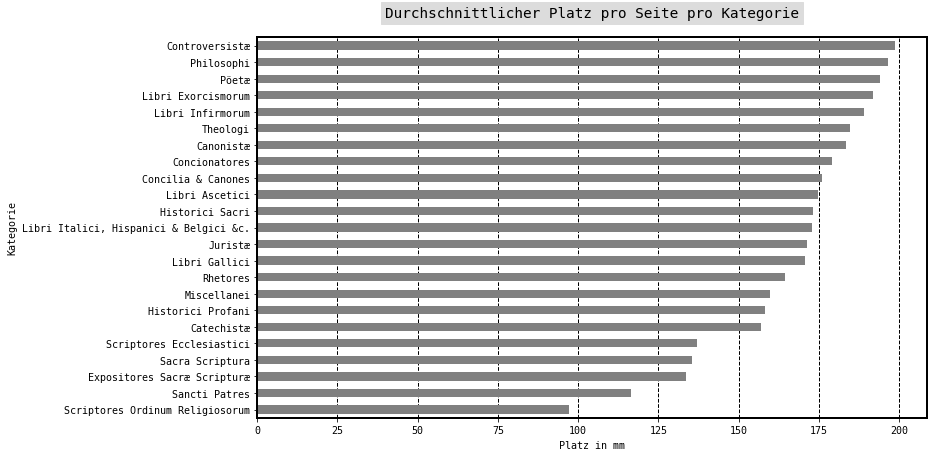

In [12]:
df_space_grouped.Durchschnitt.plot(kind="barh", figsize=(12,7))
plt.title("Durchschnittlicher Platz pro Seite pro Kategorie", backgroundcolor="gainsboro")
plt.ylabel("Kategorie")
plt.xlabel("Platz in mm")
plt.grid(axis="x")
plt.show()

## Bestand allgemein

In [13]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5271 entries, m_00001_a to m_03991_b
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m_id                  5271 non-null   object 
 1   s_id                  2181 non-null   object 
 2   authoren_ids          4538 non-null   object 
 3   sprachen              5271 non-null   object 
 4   erscheinungsorte_ids  4904 non-null   object 
 5   erscheinungsjahr      4907 non-null   float64
 6   format                5244 non-null   float64
 7   kategorie             5271 non-null   object 
 8   später_hinzugefügt    5271 non-null   int64  
 9   später_entfernt       5271 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 453.0+ KB


In [14]:
df_books.explode(column="authoren_ids").authoren_ids.nunique()

1512

In [15]:
df_books.explode(column="erscheinungsorte_ids").erscheinungsorte_ids.nunique()

176

### Anzahl Bände in den Kategorien

In [16]:
df_books_nach_kategorie = df_books["kategorie"].value_counts()
df_books_nach_kategorie

Concionatores                             1063
Theologi                                   696
Libri Ascetici                             577
Sacra Scriptura                            274
Controversistæ                             273
Canonistæ                                  213
Miscellanei                                208
Expositores Sacræ Scripturæ                204
Philosophi                                 195
Historici Profani                          190
Historici Sacri                            179
Juristæ                                    172
Libri Italici, Hispanici & Belgici &c.     162
Sancti Patres                              148
Scriptores Ordinum Religiosorum            138
Rhetores                                   105
Libri Gallici                              105
Concilia & Canones                          97
Scriptores Ecclesiastici                    91
Pöetæ                                       71
Catechistæ                                  62
Libri Infirmo

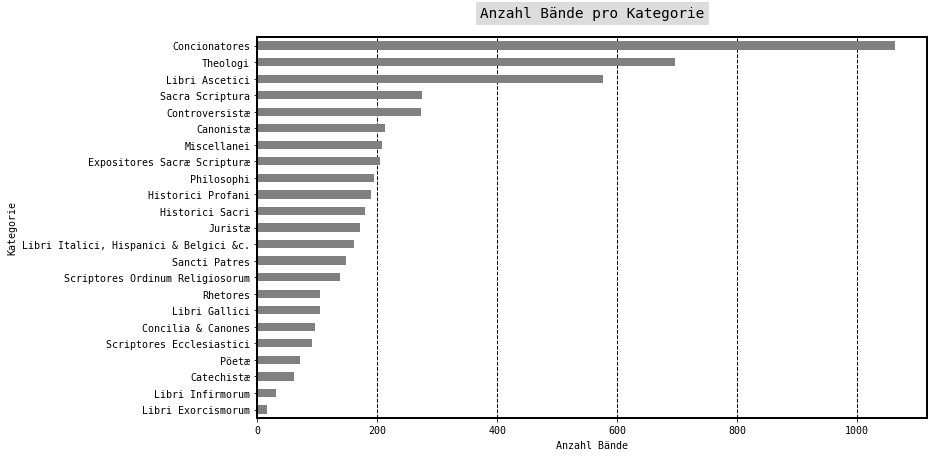

In [17]:
df_books_nach_kategorie.sort_values().plot(kind="barh", figsize=(12, 7))
plt.title("Anzahl Bände pro Kategorie", backgroundcolor="gainsboro")
plt.ylabel("Kategorie")
plt.xlabel("Anzahl Bände")
plt.grid(axis="x")
plt.show()

### Anzahl Bände in den Kategorien nach 1761

In [18]:
df_books_später_hinzugefügt = df_books[df_books.später_hinzugefügt == 1]

df_books_nach_kategorie = df_books_später_hinzugefügt["kategorie"].value_counts(normalize=True)*100
df_books_nach_kategorie = (df_books_nach_kategorie + pd.Series(0, index=df_books.kategorie.unique())).fillna(0) # Füllt die Kategorien, von denen keine Bände hinzugefügt wurden, mit 0
df_books_nach_kategorie

Canonistæ                                  4.835924
Catechistæ                                 0.518135
Concilia & Canones                         1.381693
Concionatores                             28.151986
Controversistæ                             0.172712
Expositores Sacræ Scripturæ                0.863558
Historici Profani                          2.417962
Historici Sacri                            3.281520
Juristæ                                    1.036269
Libri Ascetici                             5.354059
Libri Exorcismorum                         0.000000
Libri Gallici                              0.172712
Libri Infirmorum                           0.000000
Libri Italici, Hispanici & Belgici &c.     0.000000
Miscellanei                                9.671848
Philosophi                                 0.518135
Pöetæ                                      0.000000
Rhetores                                   0.172712
Sacra Scriptura                            6.735751
Sancti Patre

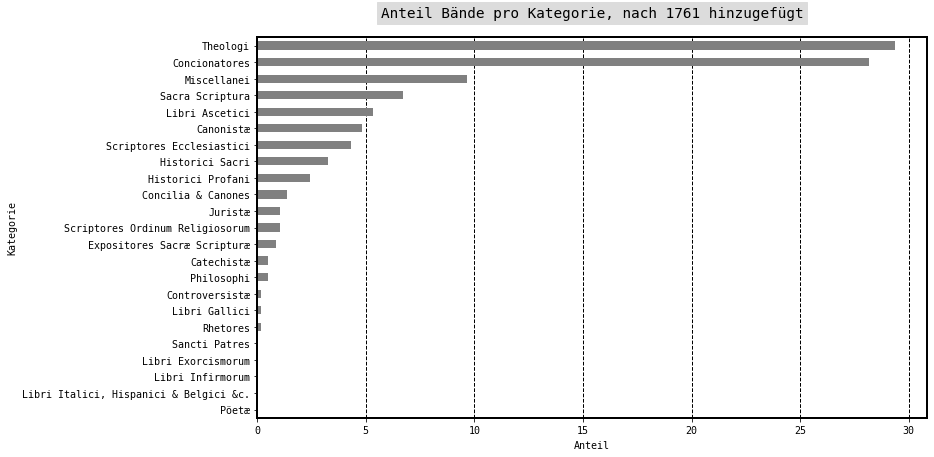

In [19]:
df_books_nach_kategorie.sort_values().plot(kind="barh", figsize=(12, 7))
plt.title("Anteil Bände pro Kategorie, nach 1761 hinzugefügt", backgroundcolor="gainsboro")
plt.ylabel("Kategorie")
plt.xlabel("Anteil")
plt.grid(axis="x")
plt.show()

### Anzahl Bände nach Format

In [20]:
df_books_nach_format = df_books["format"].value_counts()
df_books_nach_format

8.0     2070
2.0     1159
4.0     1137
12.0     685
18.0     193
Name: format, dtype: int64

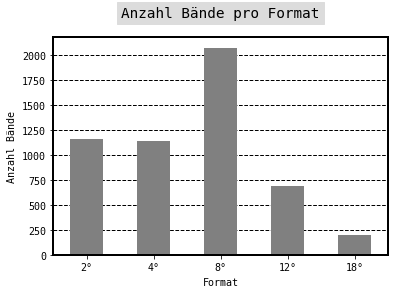

In [21]:
df_books_nach_format.sort_index().plot(kind="bar")
plt.title("Anzahl Bände pro Format", backgroundcolor="gainsboro")
plt.ylabel("Anzahl Bände")
plt.xlabel("Format")
plt.grid(axis="y")
plt.xticks([0, 1, 2, 3, 4], ["2°", "4°", "8°", "12°", "18°"], rotation=0)
plt.show()

In [22]:
df_books_nach_format_anteil = df_books["format"].value_counts(normalize=True)
df_books_nach_format_anteil = df_books_nach_format_anteil*100
df_books_nach_format_anteil

8.0     39.473684
2.0     22.101449
4.0     21.681922
12.0    13.062548
18.0     3.680397
Name: format, dtype: float64

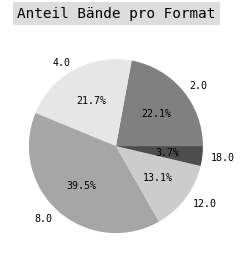

In [23]:
df_books_nach_format.sort_index().plot(kind="pie", autopct='%.1f%%')
plt.title("Anteil Bände pro Format", backgroundcolor="gainsboro")
plt.ylabel("")
plt.xlabel("")
plt.show()

### Durchschnittliches Format pro Kategorie

In [24]:
df_mean_format_per_category = df_books[["kategorie", "format"]]
df_mean_format_per_category = df_mean_format_per_category.groupby(by="kategorie").mean()
df_mean_format_per_category = df_mean_format_per_category.squeeze()
df_mean_format_per_category

kategorie
Canonistæ                                  4.046948
Catechistæ                                 8.225806
Concilia & Canones                         6.288660
Concionatores                              4.774688
Controversistæ                             7.551471
Expositores Sacræ Scripturæ                3.490196
Historici Profani                          7.305263
Historici Sacri                            7.163842
Juristæ                                    4.152047
Libri Ascetici                            10.707106
Libri Exorcismorum                        11.058824
Libri Gallici                              8.761905
Libri Infirmorum                           9.032258
Libri Italici, Hispanici & Belgici &c.     8.395062
Miscellanei                                6.605769
Philosophi                                 7.834197
Pöetæ                                      9.183099
Rhetores                                   7.638095
Sacra Scriptura                            7.102190
Sa

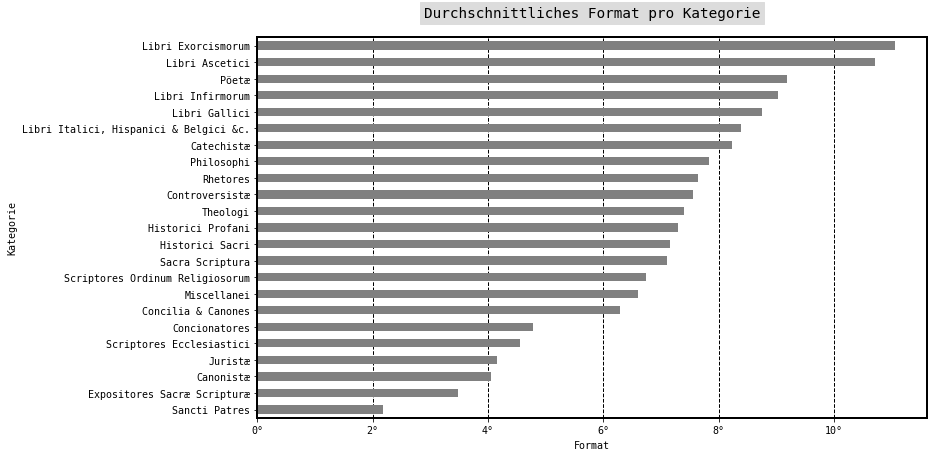

In [25]:
df_mean_format_per_category.sort_index().sort_values().plot(kind="barh", figsize=(12, 7))
plt.title("Durchschnittliches Format pro Kategorie", backgroundcolor="gainsboro")
plt.xlabel("Format")
plt.ylabel("Kategorie")
plt.grid(axis="x")
plt.xticks([0, 2, 4, 6, 8, 10], ["0°", "2°", "4°", "6°", "8°", "10°"], rotation=0)
plt.show()

### Verteilung der Erscheinungsjahre

In [26]:
df_books_erscheinungsjahre = df_books["erscheinungsjahr"]
percent_angaben = (df_books_erscheinungsjahre.count() / len(df_books_erscheinungsjahre))*100
percent_angaben

93.09428950863213

#### Alle

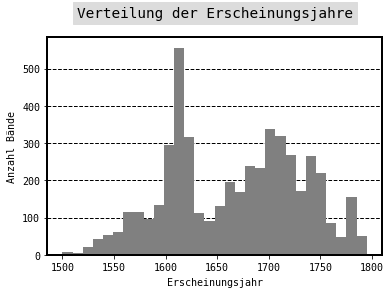

In [27]:
df_books_erscheinungsjahre.plot(kind="hist", bins=30)
plt.title("Verteilung der Erscheinungsjahre", backgroundcolor="gainsboro")
plt.ylabel("Anzahl Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")
plt.show()

# Einbruch ab ca 1620 liegt sicherlich am 30jährigen Krieg. Entweder weil Buchproduktion sowieso eingebrochen ist oder weil Kloster andere Probleme hatte als aktuelle Bücher zu beschaffen.

##### Durchschnittliches Erscheinungsdatum:

In [28]:
df_books_erscheinungsjahre.mean()

1666.8227022620747

#### Concionatores

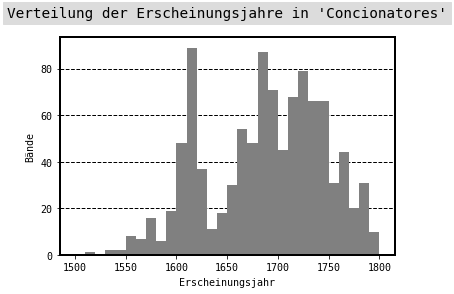

In [29]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Concionatores"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Concionatores'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Theologi

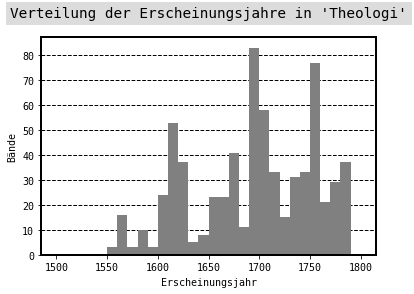

In [30]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Theologi"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Theologi'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Libri Ascetici

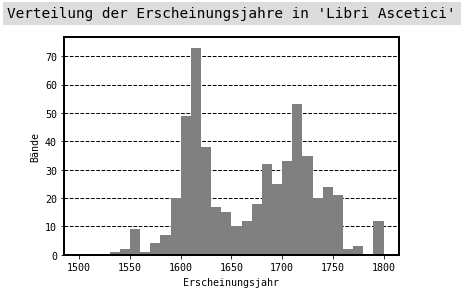

In [31]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Libri Ascetici"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Libri Ascetici'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Sacra Scriptura

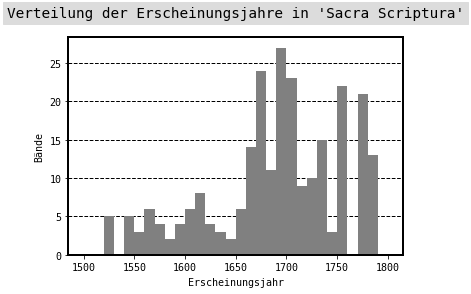

In [32]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Sacra Scriptura"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Sacra Scriptura'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Controversistæ

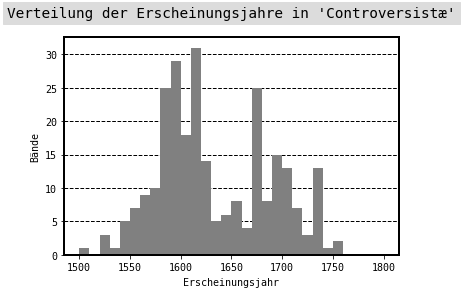

In [33]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Controversistæ"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Controversistæ'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Canonistæ

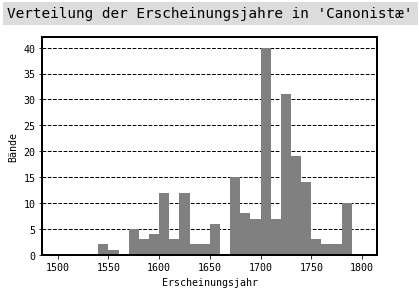

In [34]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Canonistæ"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Canonistæ'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Miscellanei

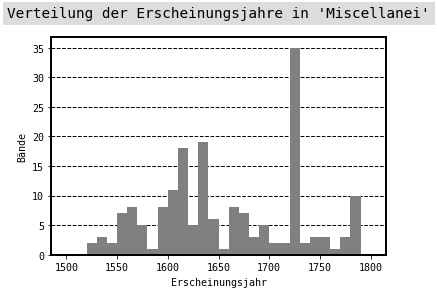

In [35]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Miscellanei"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Miscellanei'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Expositores Sacræ Scripturæ

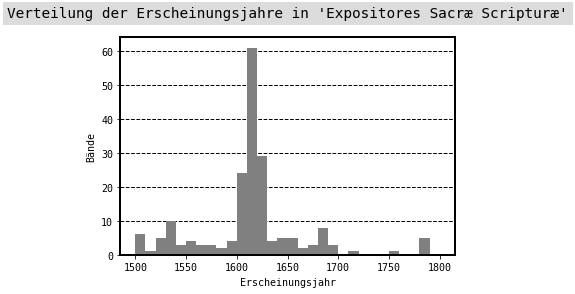

In [36]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Expositores Sacræ Scripturæ"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Expositores Sacræ Scripturæ'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Philosophi

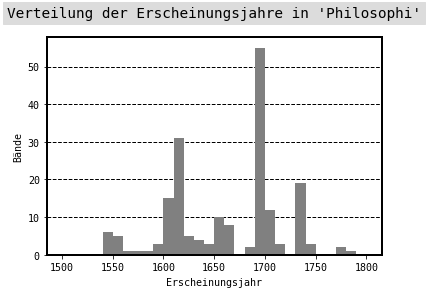

In [37]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Philosophi"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Philosophi'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Historici Profani

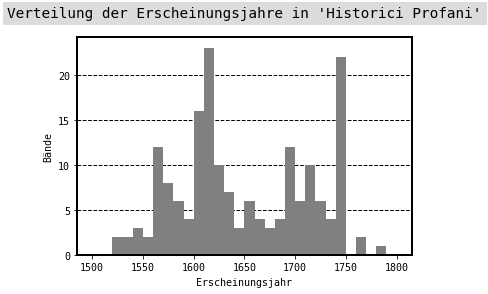

In [38]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Historici Profani"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Historici Profani'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Historici Sacri

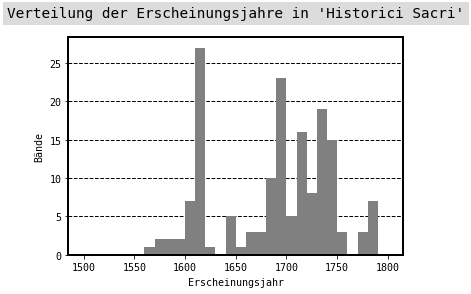

In [39]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Historici Sacri"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Historici Sacri'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Juristæ

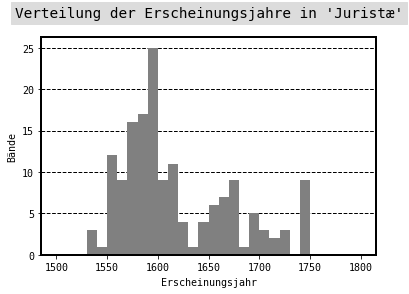

In [40]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Juristæ"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Juristæ'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Libri Italici, Hispanici & Belgici &c.

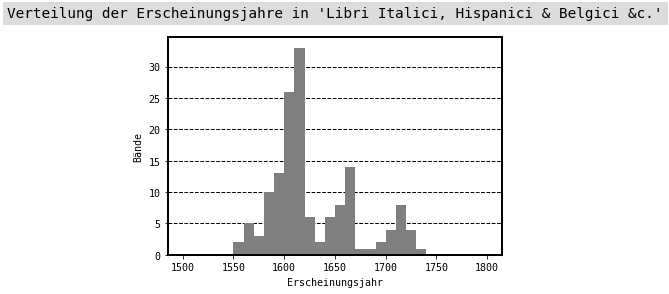

In [41]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Libri Italici, Hispanici & Belgici &c."]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Libri Italici, Hispanici & Belgici &c.'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Sancti Patres

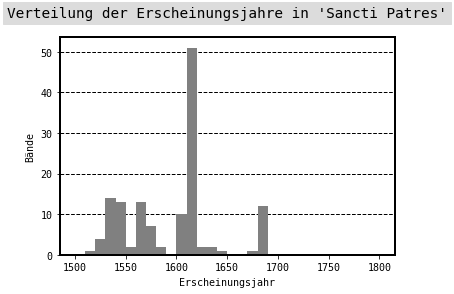

In [42]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Sancti Patres"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Sancti Patres'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Scriptores Ordinum Religiosorum

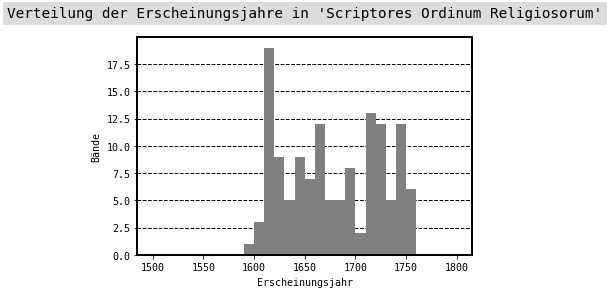

In [43]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Scriptores Ordinum Religiosorum"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Scriptores Ordinum Religiosorum'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Rhetores

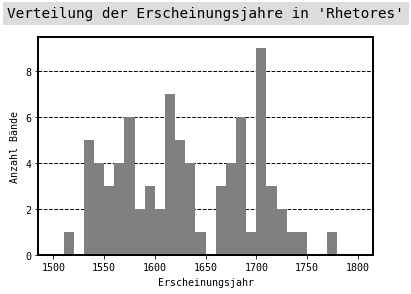

In [44]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Rhetores"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Rhetores'", backgroundcolor="gainsboro")
plt.ylabel("Anzahl Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Libri Gallici

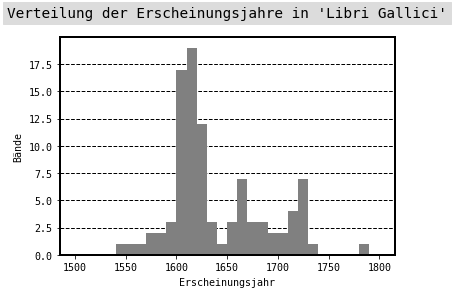

In [45]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Libri Gallici"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Libri Gallici'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Concilia & Canones

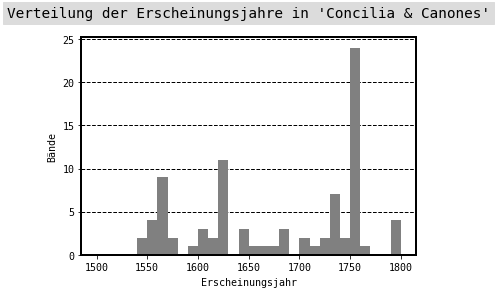

In [46]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Concilia & Canones"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Concilia & Canones'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Scriptores Ecclesiastici

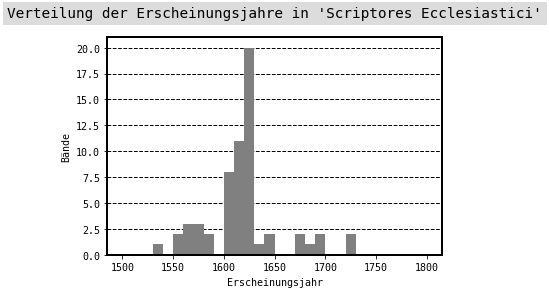

In [47]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Scriptores Ecclesiastici"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Scriptores Ecclesiastici'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Pöetæ

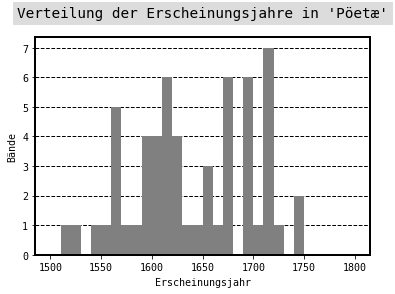

In [48]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Pöetæ"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Pöetæ'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Catechistæ

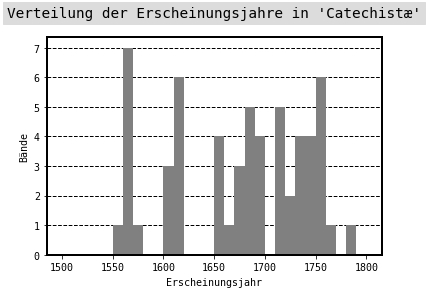

In [49]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Catechistæ"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Catechistæ'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Libri Infirmorum

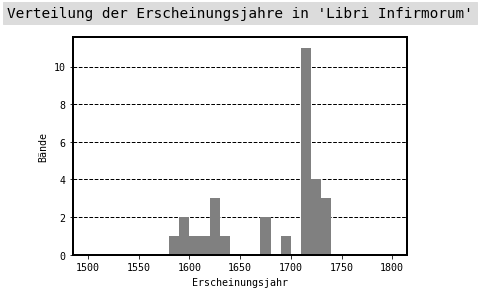

In [50]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Libri Infirmorum"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Libri Infirmorum'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Libri Exorcismorum

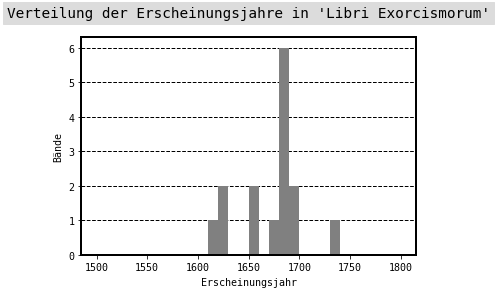

In [51]:
df_books_erscheinungsjahre_per_category = df_books[df_books.kategorie == "Libri Exorcismorum"]["erscheinungsjahr"]
df_books_erscheinungsjahre_per_category.plot(kind="hist", bins=30, range=(1500, 1800))

plt.title("Verteilung der Erscheinungsjahre in 'Libri Exorcismorum'", backgroundcolor="gainsboro")
plt.ylabel("Bände")
plt.xlabel("Erscheinungsjahr")
plt.grid(axis="y")

plt.show()

#### Durchschnittliches Erscheinungsjahr nach Kategorie

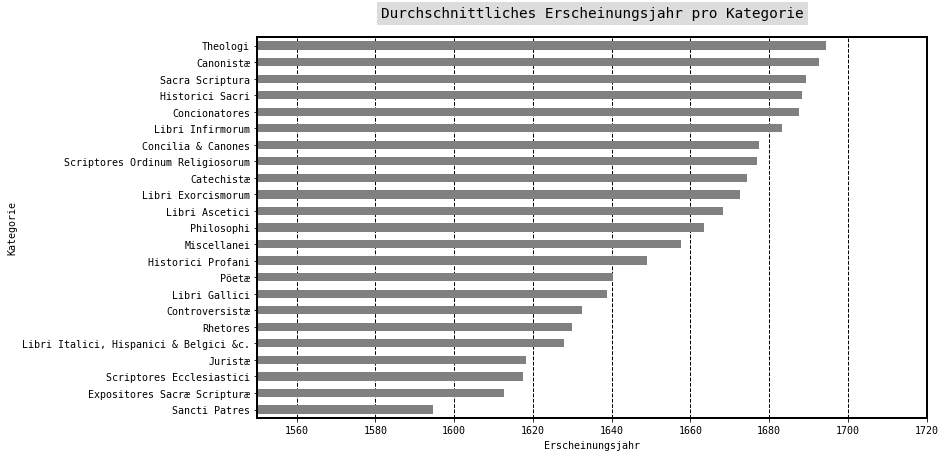

In [52]:
df_books_mean_erscheinungsjahr_per_category = df_books[["kategorie", "erscheinungsjahr"]]
df_books_mean_erscheinungsjahr_per_category = df_books_mean_erscheinungsjahr_per_category.groupby(by="kategorie").mean().squeeze()

df_books_mean_erscheinungsjahr_per_category.sort_values().plot(kind="barh", xlim=[1550, 1720], figsize=(12, 7))
plt.title("Durchschnittliches Erscheinungsjahr pro Kategorie", backgroundcolor="gainsboro")
plt.xlabel("Erscheinungsjahr")
plt.ylabel("Kategorie")
plt.grid(axis="x")
plt.show()

## Länder und Sprachen

### Erscheinungsorte

In [53]:
percent_angaben = (df_books.erscheinungsorte_ids.count() / len(df_books.erscheinungsorte_ids))*100
percent_angaben

93.03737431227471

In [54]:
df_books_exploded_erscheinungsorte = df_books.explode(["erscheinungsorte_ids"])

##### Anteil der Erscheinungsorte

In [55]:
df_counted_erscheinungsorte = df_books_exploded_erscheinungsorte.erscheinungsorte_ids.value_counts(normalize=True)*100
df_counted_erscheinungsorte.rename("anteil", inplace=True)
df_counted_erscheinungsorte

pl_00002    32.119871
pl_00006     9.533387
pl_00003     6.496380
pl_00009     4.465004
pl_00015     4.263878
              ...    
pl_00046     0.020113
pl_00127     0.020113
pl_00125     0.020113
pl_00124     0.020113
pl_00221     0.020113
Name: anteil, Length: 176, dtype: float64

In [56]:
df_counted_erscheinungsorte_merged = pd.merge(df_counted_erscheinungsorte, df_places, left_index=True, right_index=True)
df_counted_erscheinungsorte_merged



anteil               name  koordinaten_lat  koordinaten_lon  \
pl_00002  32.119871               Köln         50.93333          6.95000   
pl_00006   9.533387           Augsburg         48.37154         10.89851   
pl_00003   6.496380          Antwerpen         51.22047          4.40026   
pl_00009   4.465004              Mainz         49.98419          8.27910   
pl_00015   4.263878  Frankfurt am Main         50.11552          8.68417   
...             ...                ...              ...              ...   
pl_00046   0.020113         Heidelberg         49.40768          8.69079   
pl_00127   0.020113              Brühl         50.82928          6.90499   
pl_00125   0.020113            Insulis              NaN              NaN   
pl_00124   0.020113             Passau         48.56650         13.43122   
pl_00221   0.020113          Bielefeld         52.03333          8.53333   

                 land  
pl_00002  Deutschland  
pl_00006  Deutschland  
pl_00003      Belgien  
pl_00009  Deutschland  
pl_00015  Deutschland  
...               ...  
pl_00046  Deutschland  
pl_00127  Deutschland  
pl_00125               
pl_00124  Deutschland  
pl_00221  Deutschland  

[176 rows x 5 columns]

In [57]:
df_counted_erscheinungsorte_merged_x = df_counted_erscheinungsorte_merged.set_index("name")
df_counted_erscheinungsorte_merged_x = df_counted_erscheinungsorte_merged_x.iloc[0:20, :]
df_counted_erscheinungsorte_merged_x

anteil  koordinaten_lat  koordinaten_lon         land
name                                                                       
Köln               32.119871         50.93333          6.95000  Deutschland
Augsburg            9.533387         48.37154         10.89851  Deutschland
Antwerpen           6.496380         51.22047          4.40026      Belgien
Mainz               4.465004         49.98419          8.27910  Deutschland
Frankfurt am Main   4.263878         50.11552          8.68417  Deutschland
Paderborn           3.238134         51.71905          8.75439  Deutschland
Lyon                2.514079         45.74846          4.84671   Frankreich
Paris               2.473854         48.85341          2.34880   Frankreich
Ingolstadt          2.353178         48.76508         11.42372  Deutschland
München             2.312953         48.13743         11.57549  Deutschland
Venedig             2.292840         45.43713         12.33265      Italien
Basel               1.971038         47.56690          7.61519      Schweiz
Salzburg            1.226870         47.79941         13.04399   Österreich
Würzburg            1.226870         49.79391          9.95121  Deutschland
Dillingen           1.206758         48.58153         10.49527  Deutschland
Münster             1.186645         51.96236          7.62571  Deutschland
Schloss Neuhaus     1.065969         51.74709          8.71540  Deutschland
Hildesheim          0.945294         52.15077          9.95112  Deutschland
Wien                0.925181         48.20820         16.37169   Österreich
Nürnberg            0.925181         49.45421         11.07752  Deutschland

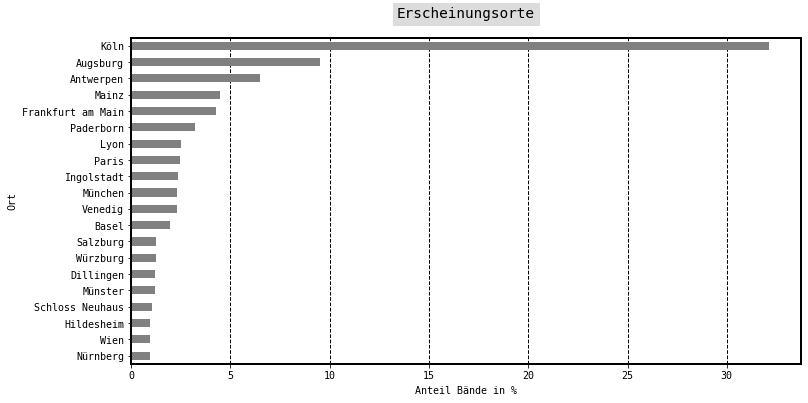

In [58]:
df_counted_erscheinungsorte_merged_x.anteil.sort_values(ascending=True).plot(kind="barh", figsize=(12, 6))
plt.title("Erscheinungsorte", backgroundcolor="gainsboro")
plt.ylabel("Ort")
plt.xlabel("Anteil Bände in %")
plt.grid(axis="x")
plt.show()

##### Anteil der Erscheinungsorte in heutigen Ländern

In [59]:
df_erscheinungsorte_merged = pd.merge(df_books_exploded_erscheinungsorte, df_places, left_on="erscheinungsorte_ids", right_index=True)
df_erscheinungsorte_merged

m_id     s_id authoren_ids sprachen erscheinungsorte_ids  \
id                                                                       
m_00001_a  m_00001     None         None      lat             pl_00001   
m_00002_a  m_00002     None         None      lat             pl_00001   
m_00119_a  m_00119     None         None      lat             pl_00001   
m_00121_a  m_00121     None         None      lat             pl_00001   
m_00493_a  m_00493  s_00059     pe_00092      lat             pl_00001   
...            ...      ...          ...      ...                  ...   
m_03946_a  m_03946     None         None      ita             pl_00218   
m_03954_a  m_03954  s_00510     pe_00734      lat             pl_00219   
m_03955_a  m_03955  s_00510     pe_00734      lat             pl_00219   
m_03956_a  m_03956  s_00510     pe_00734      lat             pl_00219   
m_03977_a  m_03977     None         None      lat             pl_00221   

           erscheinungsjahr  format                               kategorie  \
id                                                                            
m_00001_a            1525.0     2.0                         Sacra Scriptura   
m_00002_a            1526.0     2.0                         Sacra Scriptura   
m_00119_a            1551.0    12.0                         Sacra Scriptura   
m_00121_a            1570.0    12.0                         Sacra Scriptura   
m_00493_a            1665.0     2.0         Scriptores Ordinum Religiosorum   
...                     ...     ...                                     ...   
m_03946_a            1574.0    18.0  Libri Italici, Hispanici & Belgici &c.   
m_03954_a            1690.0     8.0                                Theologi   
m_03955_a            1690.0     8.0                                Theologi   
m_03956_a            1690.0     8.0                                Theologi   
m_03977_a            1786.0     8.0                                Theologi   

           später_hinzugefügt  später_entfernt       name  koordinaten_lat  \
id                                                                           
m_00001_a                   0                0       Lyon         45.74846   
m_00002_a                   0                0       Lyon         45.74846   
m_00119_a                   0                0       Lyon         45.74846   
m_00121_a                   0                0       Lyon         45.74846   
m_00493_a                   0                0       Lyon         45.74846   
...                       ...              ...        ...              ...   
m_03946_a                   0                0    Florenz         43.77925   
m_03954_a                   0                0  Solothurn         47.20791   
m_03955_a                   0                0  Solothurn         47.20791   
m_03956_a                   0                0  Solothurn         47.20791   
m_03977_a                   1                0  Bielefeld         52.03333   

           koordinaten_lon         land  
id                                       
m_00001_a          4.84671   Frankreich  
m_00002_a          4.84671   Frankreich  
m_00119_a          4.84671   Frankreich  
m_00121_a          4.84671   Frankreich  
m_00493_a          4.84671   Frankreich  
...                    ...          ...  
m_03946_a         11.24626      Italien  
m_03954_a          7.53714      Schweiz  
m_03955_a          7.53714      Schweiz  
m_03956_a          7.53714      Schweiz  
m_03977_a          8.53333  Deutschland  

[4972 rows x 14 columns]

In [60]:
df_erscheinungsorte_merged.land.unique()

array(['Frankreich', 'Deutschland', 'Belgien', 'Österreich', 'Italien',
       'Tschechien', 'Schweiz', 'Luxemburg', '', 'Litauen', 'Niederlande',
       'Polen', 'Spanien', 'Griechenland', 'Schweden', 'Russland',
       'Portugal', 'Vereinigtes Königreich'], dtype=object)

In [61]:
df_counted_erscheinungsorte_länder = df_erscheinungsorte_merged.land.value_counts(normalize=True)*100
df_counted_erscheinungsorte_länder.rename("anteil", inplace=True)
df_counted_erscheinungsorte_länder = df_counted_erscheinungsorte_länder.drop(labels=[""])
df_counted_erscheinungsorte_länder

Deutschland               73.109413
Belgien                    8.487530
Frankreich                 7.039421
Italien                    3.761062
Österreich                 2.634755
Schweiz                    2.514079
Niederlande                0.724055
Tschechien                 0.663717
Polen                      0.281577
Luxemburg                  0.241352
Spanien                    0.201126
Litauen                    0.040225
Vereinigtes Königreich     0.040225
Griechenland               0.020113
Schweden                   0.020113
Russland                   0.020113
Portugal                   0.020113
Name: anteil, dtype: float64

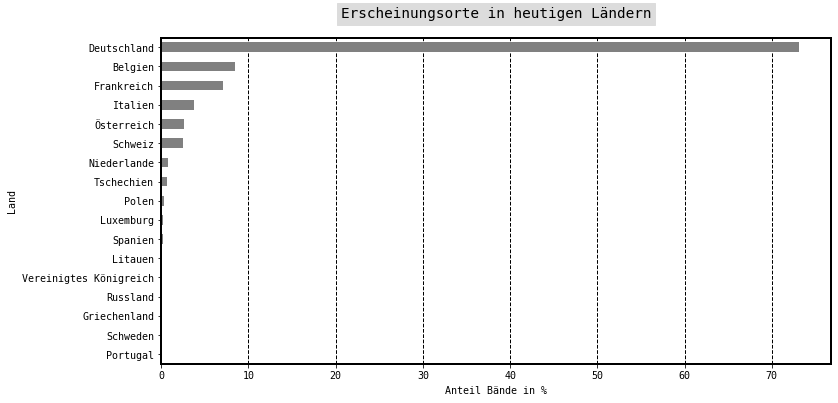

In [62]:
df_counted_erscheinungsorte_länder.sort_values(ascending=True).plot(kind="barh", figsize=(12, 6))
plt.title("Erscheinungsorte in heutigen Ländern", backgroundcolor="gainsboro")
plt.ylabel("Land")
plt.xlabel("Anteil Bände in %")
plt.grid(axis="x")
plt.show()

##### Abstand Druckorte zu Paderborn

In [63]:
lat_paderborn = df_places.loc["pl_00027", "koordinaten_lat"]
lon_paderborn = df_places.loc["pl_00027", "koordinaten_lon"]

df_places_withCoordinates = df_places.dropna(subset = ["koordinaten_lat"])
df_distanceToPaderborn = df_places_withCoordinates.apply(lambda row: distance.great_circle((lat_paderborn, lon_paderborn), (row.koordinaten_lat, row.koordinaten_lon)).km, axis=1)
df_distanceToPaderborn.rename("abstand_zu_paderborn", inplace=True)

df_distanceToPaderborn_merged = pd.merge(df_distanceToPaderborn, df_places, left_index=True, right_index=True)
erscheinungsorte = df_books_exploded_erscheinungsorte.erscheinungsorte_ids.unique()
df_distanceToPaderborn_erscheinungsorte = df_distanceToPaderborn_merged[df_distanceToPaderborn_merged.index.isin(erscheinungsorte)]
df_distanceToPaderborn_erscheinungsorte = df_distanceToPaderborn_erscheinungsorte.set_index("name")
df_distanceToPaderborn_erscheinungsorte = df_distanceToPaderborn_erscheinungsorte.sort_values(by=["abstand_zu_paderborn"], ascending=False)
df_distanceToPaderborn_erscheinungsorte.head(40)


abstand_zu_paderborn  koordinaten_lat  koordinaten_lon  \
name                                                                         
Lissabon                     2002.792790         38.71667        -9.133330   
Daulia                       1826.370312         38.50996        22.730799   
Madrid                       1577.497601         40.41650        -3.702560   
Valencia                     1533.473435         39.46975        -0.377390   
Lleida                       1281.486864         41.61674         0.622180   
Napoli                       1279.542346         40.85216        14.268110   
Barcelona                    1253.254030         41.38879         2.158990   
Vilnius                      1146.010016         54.68916        25.279800   
Rom                          1129.122012         41.89193        12.511330   
Toulouse                     1054.236668         43.60426         1.443670   
Ambres                       1027.703249         43.73167         1.813330   
Stockholm                    1027.415697         59.32938        18.068710   
Macerata                     1000.154149         43.29789        13.452930   
Lublin                        956.405926         51.25000        22.566670   
Florenz                       902.165369         43.77925        11.246260   
Lucca                         885.339525         43.84369        10.504470   
Königsberg                    849.085124         54.70649        20.510950   
Warschau                      840.511898         52.22977        21.011780   
Bologna                       825.867285         44.49381        11.338750   
Krakau                        804.837655         50.06143        19.936580   
Modena                        802.491583         44.64783        10.925390   
Braunsberg/Ermland            795.528830         54.37971        19.819590   
Ferrara                       793.822527         44.83804        11.620570   
Venedig                       746.239753         45.43713        12.332650   
Turin                         743.454636         45.07049         7.686820   
Padua                         738.445764         45.40797        11.885860   
Pavia                         726.380712         45.19205         9.159170   
Lyon                          722.851411         45.74846         4.846710   
Verona                        718.218225         45.42990        10.984440   
Graz                          708.261093         47.06667        15.450000   
Trévoux                       705.095552         45.94281         4.771430   
Blois                         703.691044         47.59432         1.329120   
Tournon                       698.920509         45.64171         6.318850   
Bassano del Grappa            696.709073         45.76656        11.727390   
Mailand                       696.233081         45.46427         9.189510   
Brescia                       695.858274         45.53558        10.214720   
Wien                          669.722980         48.20820        16.371690   
Genf                          642.218831         46.20222         6.145690   
Brünn                         622.342646         49.19522        16.607960   
London                        613.219328         51.50853        -0.125740   

                                      land  
name                                        
Lissabon                          Portugal  
Daulia                        Griechenland  
Madrid                             Spanien  
Valencia                           Spanien  
Lleida                             Spanien  
Napoli                             Italien  
Barcelona                          Spanien  
Vilnius                            Litauen  
Rom                                Italien  
Toulouse                        Frankreich  
Ambres                          Frankreich  
Stockholm                         Schweden  
Macerata                           Italien  
Lublin                               Polen  
Florenz                

##### Erscheinungsorte auf Karte alle

In [64]:
# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_counted_erscheinungsorte_merged, geometry=gpd.points_from_xy(df_counted_erscheinungsorte_merged.koordinaten_lon, df_counted_erscheinungsorte_merged.koordinaten_lat))
gdf

anteil               name  koordinaten_lat  koordinaten_lon  \
pl_00002  32.119871               Köln         50.93333          6.95000   
pl_00006   9.533387           Augsburg         48.37154         10.89851   
pl_00003   6.496380          Antwerpen         51.22047          4.40026   
pl_00009   4.465004              Mainz         49.98419          8.27910   
pl_00015   4.263878  Frankfurt am Main         50.11552          8.68417   
...             ...                ...              ...              ...   
pl_00046   0.020113         Heidelberg         49.40768          8.69079   
pl_00127   0.020113              Brühl         50.82928          6.90499   
pl_00125   0.020113            Insulis              NaN              NaN   
pl_00124   0.020113             Passau         48.56650         13.43122   
pl_00221   0.020113          Bielefeld         52.03333          8.53333   

                 land                   geometry  
pl_00002  Deutschland   POINT (6.95000 50.93333)  
pl_00006  Deutschland  POINT (10.89851 48.37154)  
pl_00003      Belgien   POINT (4.40026 51.22047)  
pl_00009  Deutschland   POINT (8.27910 49.98419)  
pl_00015  Deutschland   POINT (8.68417 50.11552)  
...               ...                        ...  
pl_00046  Deutschland   POINT (8.69079 49.40768)  
pl_00127  Deutschland   POINT (6.90499 50.82928)  
pl_00125                             POINT EMPTY  
pl_00124  Deutschland  POINT (13.43122 48.56650)  
pl_00221  Deutschland   POINT (8.53333 52.03333)  

[176 rows x 6 columns]

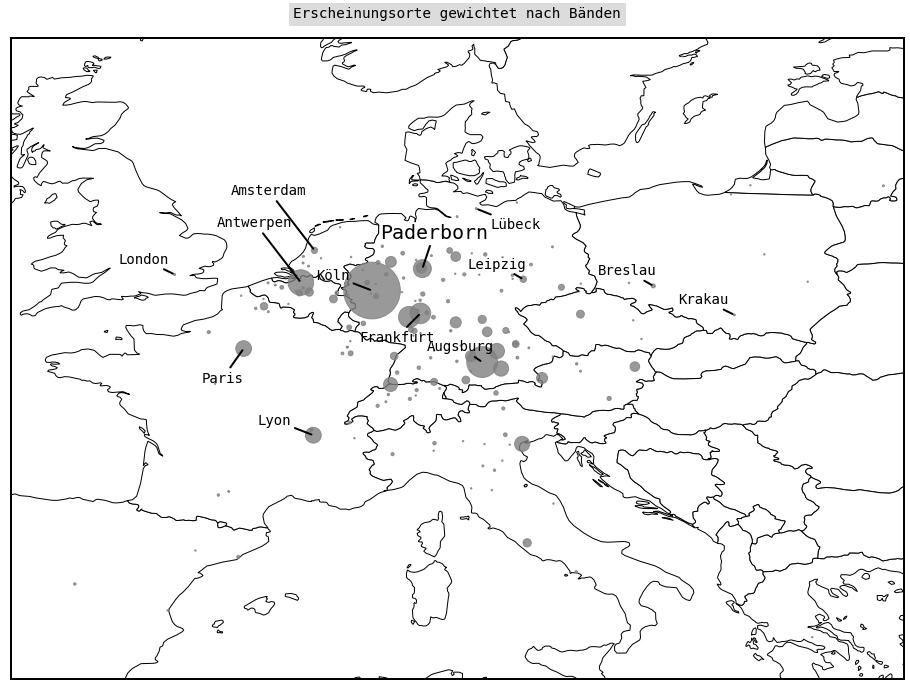

In [65]:
paderborn_x = float(gdf.loc["pl_00027", "koordinaten_lon"])
paderborn_y = float(gdf.loc["pl_00027", "koordinaten_lat"])

antwerpen_x = float(gdf.loc["pl_00003", "koordinaten_lon"])
antwerpen_y = float(gdf.loc["pl_00003", "koordinaten_lat"])

amsterdam_x = float(gdf.loc["pl_00078", "koordinaten_lon"])
amsterdam_y = float(gdf.loc["pl_00078", "koordinaten_lat"])

london_x = float(gdf.loc["pl_00206", "koordinaten_lon"])
london_y = float(gdf.loc["pl_00206", "koordinaten_lat"])

paris_x = float(gdf.loc["pl_00004", "koordinaten_lon"])
paris_y = float(gdf.loc["pl_00004", "koordinaten_lat"])

lyon_x = float(gdf.loc["pl_00001", "koordinaten_lon"])
lyon_y = float(gdf.loc["pl_00001", "koordinaten_lat"])

köln_x = float(gdf.loc["pl_00002", "koordinaten_lon"])
köln_y = float(gdf.loc["pl_00002", "koordinaten_lat"])

mainz_x = float(gdf.loc["pl_00009", "koordinaten_lon"])
mainz_y = float(gdf.loc["pl_00009", "koordinaten_lat"])

frankfurt_x = float(gdf.loc["pl_00015", "koordinaten_lon"])
frankfurt_y = float(gdf.loc["pl_00015", "koordinaten_lat"])

augsburg_x = float(gdf.loc["pl_00006", "koordinaten_lon"])
augsburg_y = float(gdf.loc["pl_00006", "koordinaten_lat"])

leipzig_x = float(gdf.loc["pl_00074", "koordinaten_lon"])
leipzig_y = float(gdf.loc["pl_00074", "koordinaten_lat"])

breslau_x = float(gdf.loc["pl_00123", "koordinaten_lon"])
breslau_y = float(gdf.loc["pl_00123", "koordinaten_lat"])

krakau_x = float(gdf.loc["pl_00122", "koordinaten_lon"])
krakau_y = float(gdf.loc["pl_00122", "koordinaten_lat"])

lübeck_x = float(gdf.loc["pl_00160", "koordinaten_lon"])
lübeck_y = float(gdf.loc["pl_00160", "koordinaten_lat"])


ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fontsize= 14

ax.annotate('Paderborn', xy=(paderborn_x, paderborn_y), xytext=(paderborn_x - 1.5, paderborn_y + 1.1), fontsize=20, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))      
ax.annotate('Antwerpen', xy=(antwerpen_x, antwerpen_y), xytext=(antwerpen_x - 3, antwerpen_y + 2), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('Amsterdam', xy=(amsterdam_x, amsterdam_y), xytext=(amsterdam_x - 3, amsterdam_y + 2), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('London', xy=(london_x, london_y), xytext=(london_x - 2, london_y + 0.4), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('Paris', xy=(paris_x, paris_y), xytext=(paris_x - 1.5, paris_y - 1.2), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('Lyon', xy=(lyon_x, lyon_y), xytext=(lyon_x - 2, lyon_y + 0.4), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('Köln', xy=(köln_x, köln_y), xytext=(köln_x - 2, köln_y + 0.4), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('Frankfurt', xy=(frankfurt_x, frankfurt_y), xytext=(frankfurt_x - 2.2, frankfurt_y - 1), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('Augsburg', xy=(augsburg_x, augsburg_y), xytext=(augsburg_x - 2, augsburg_y + 0.4), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('Leipzig', xy=(leipzig_x, leipzig_y), xytext=(leipzig_x - 2, leipzig_y + 0.4), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('Breslau', xy=(breslau_x, breslau_y), xytext=(breslau_x - 2, breslau_y + 0.4), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('Krakau', xy=(krakau_x, krakau_y), xytext=(krakau_x - 2, krakau_y + 0.4), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))
ax.annotate('Lübeck', xy=(lübeck_x, lübeck_y), xytext=(lübeck_x + 0.5, lübeck_y - 0.7), fontsize=fontsize, arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3', lw=2))

plt.title("Erscheinungsorte gewichtet nach Bänden", backgroundcolor="gainsboro")
plt.show()

##### Erscheinungsorte auf Karte Canonistæ

In [66]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Canonistæ"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))


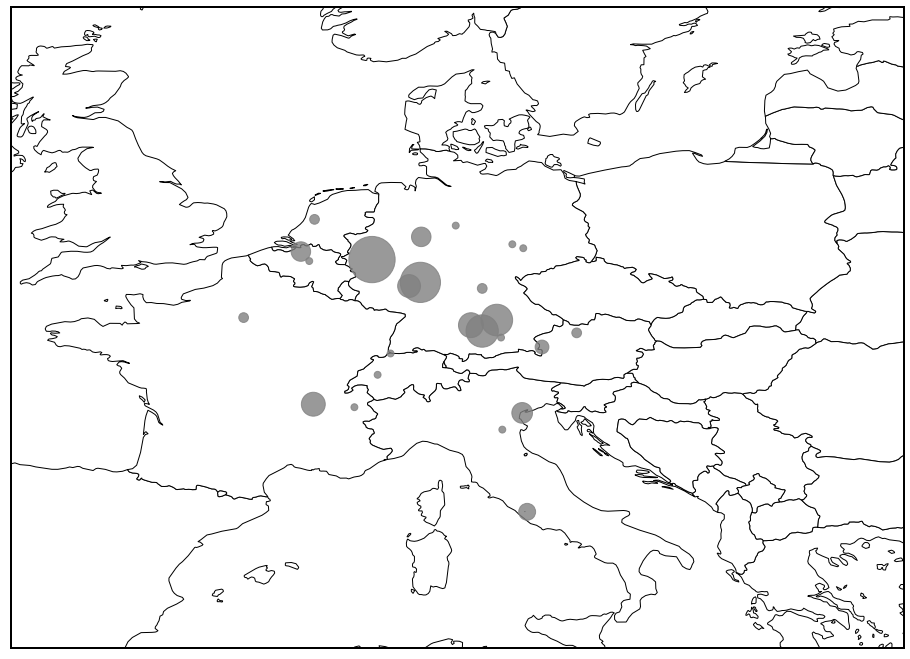

In [67]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Catechistæ

In [68]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Catechistæ"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

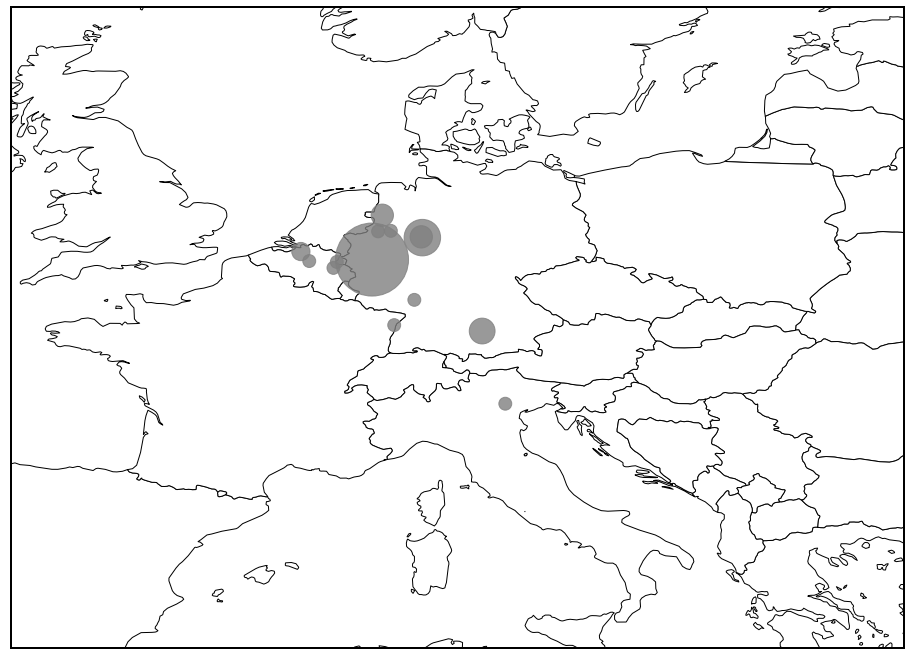

In [69]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Concilia & Canones

In [70]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Concilia & Canones"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

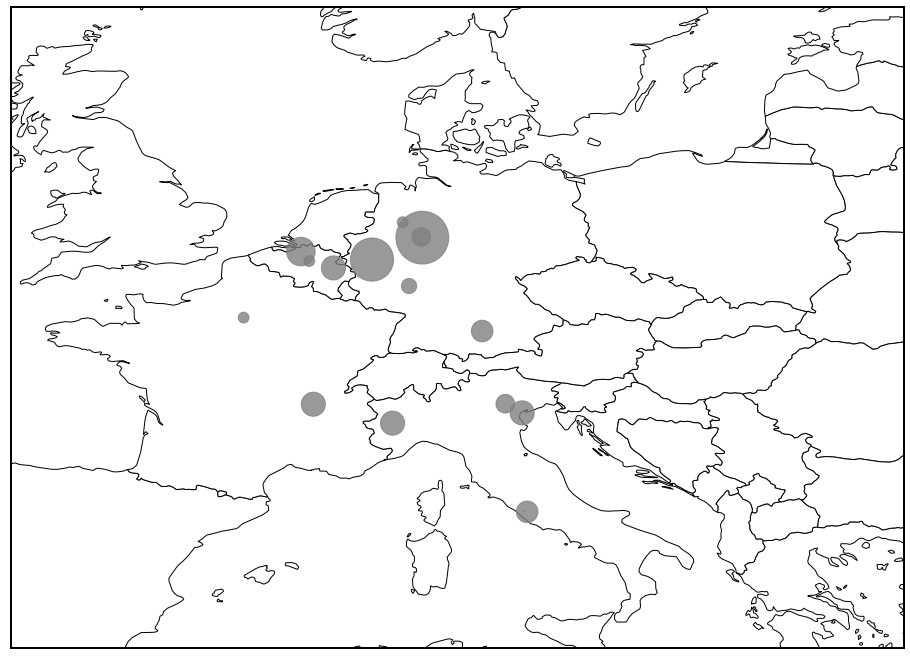

In [71]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Concionatores

In [72]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Concionatores"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

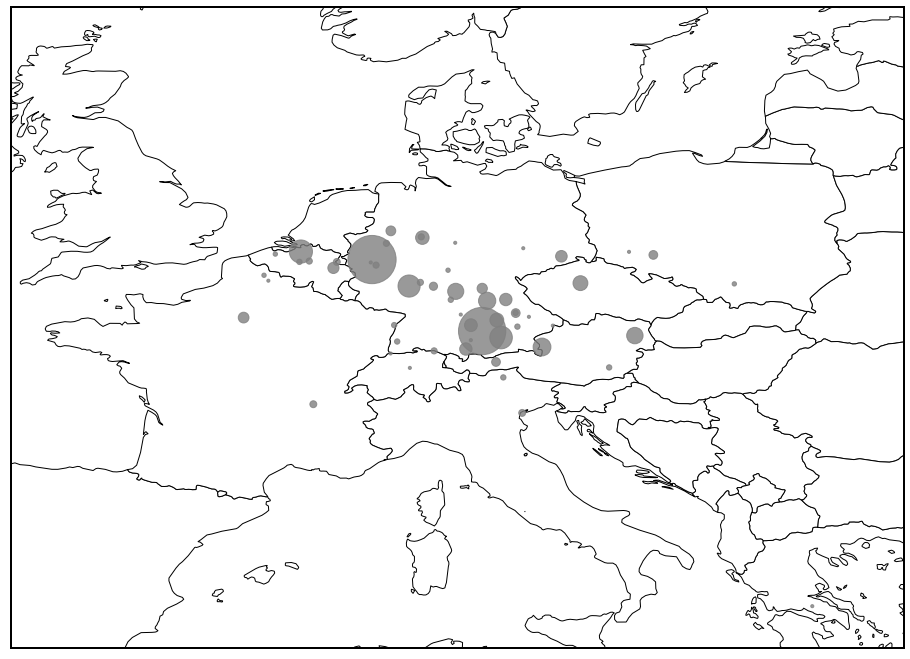

In [73]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Controversistæ

In [74]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Controversistæ"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

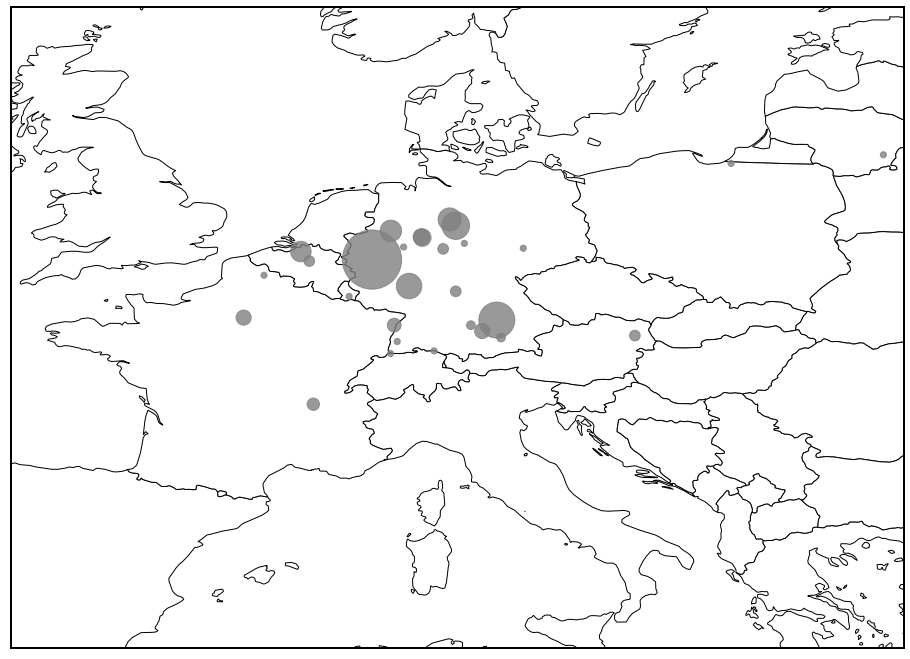

In [75]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Expositores Sacræ Scripturæ

In [76]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Expositores Sacræ Scripturæ"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

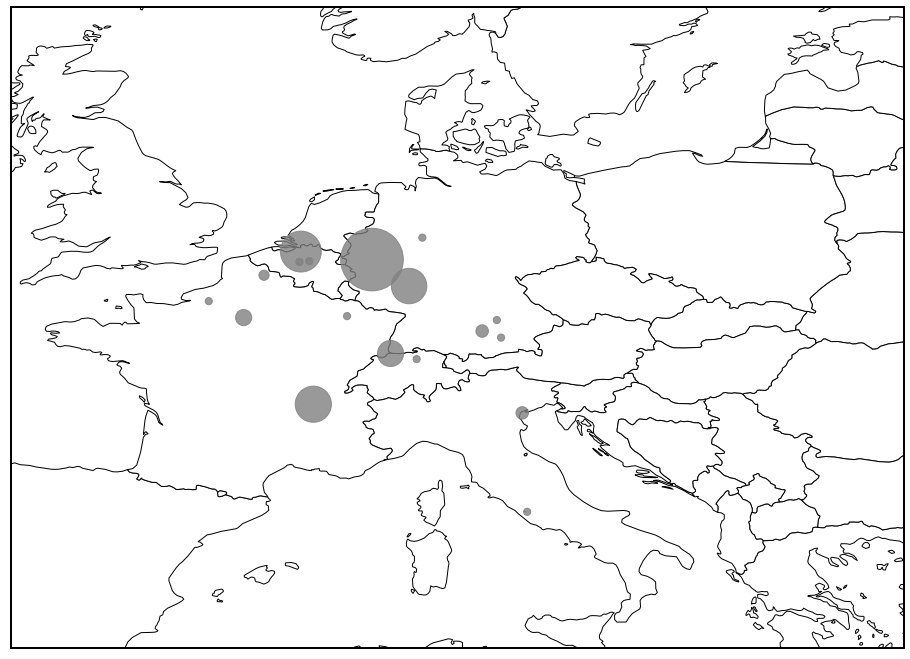

In [77]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Historici Profani

In [78]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Historici Profani"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

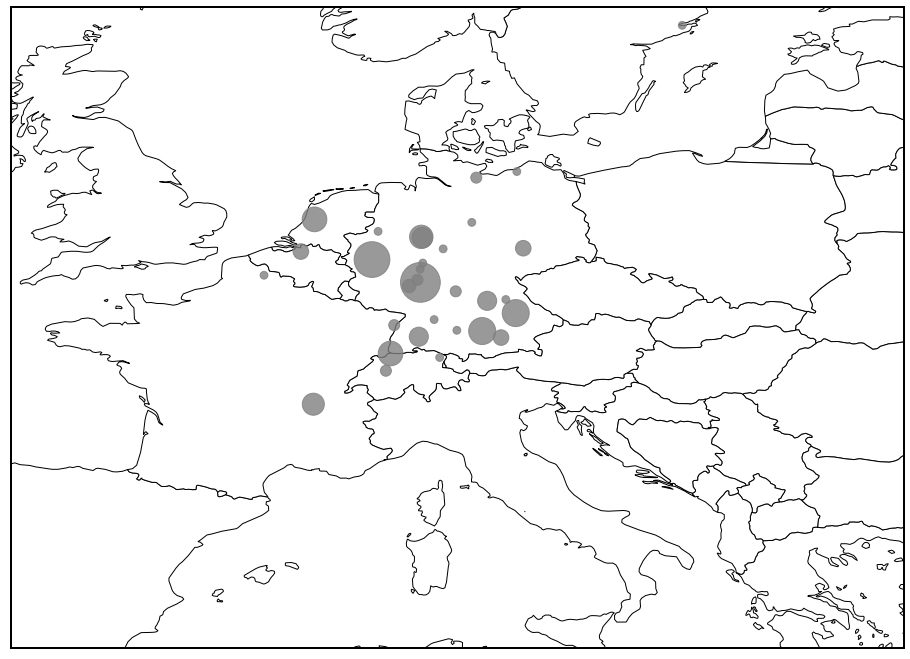

In [79]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Historici Sacri

In [80]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Historici Sacri"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

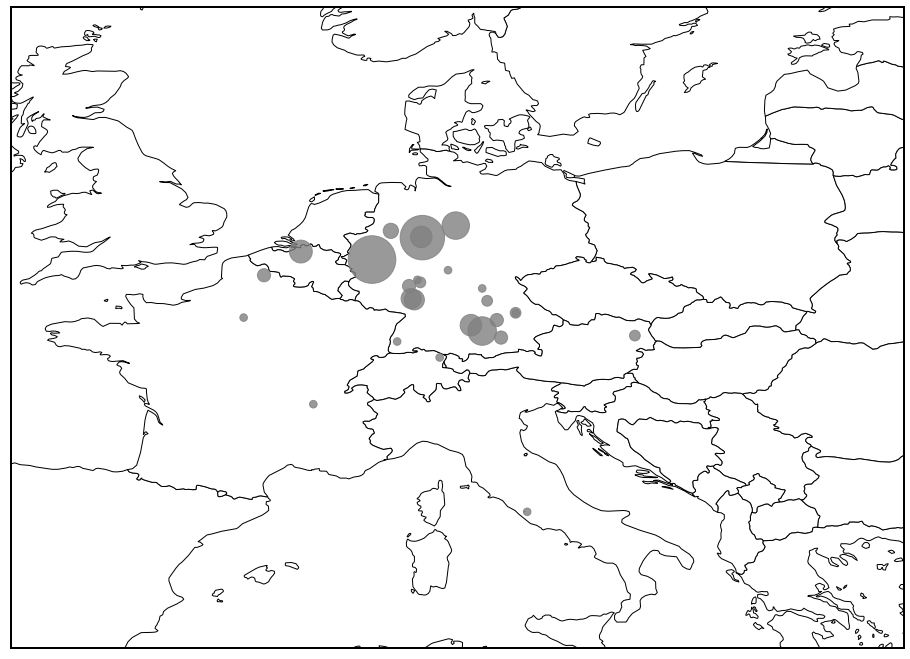

In [81]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Juristæ

In [82]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Juristæ"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

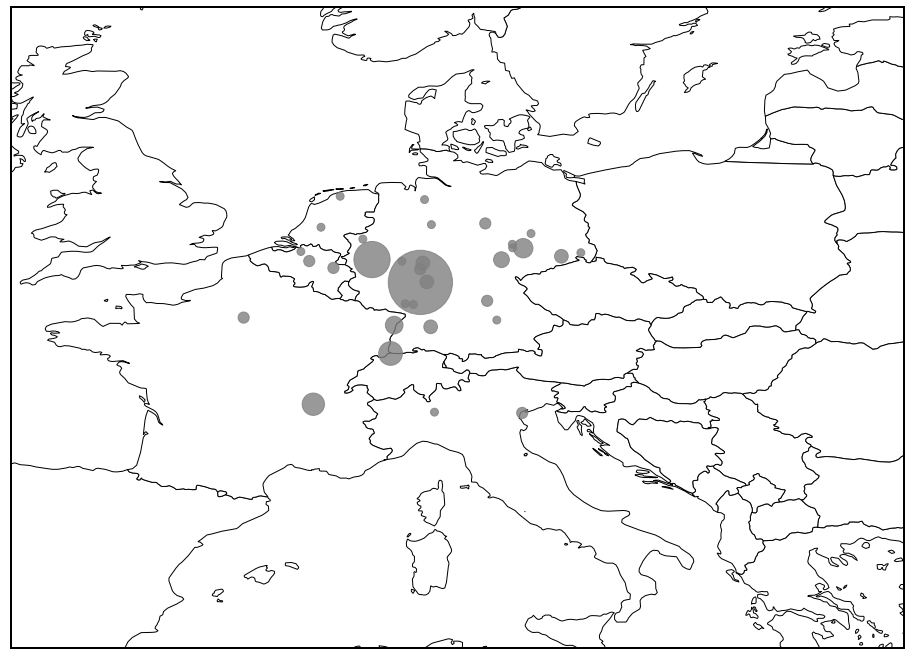

In [83]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Libri Ascetici

In [84]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Libri Ascetici"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

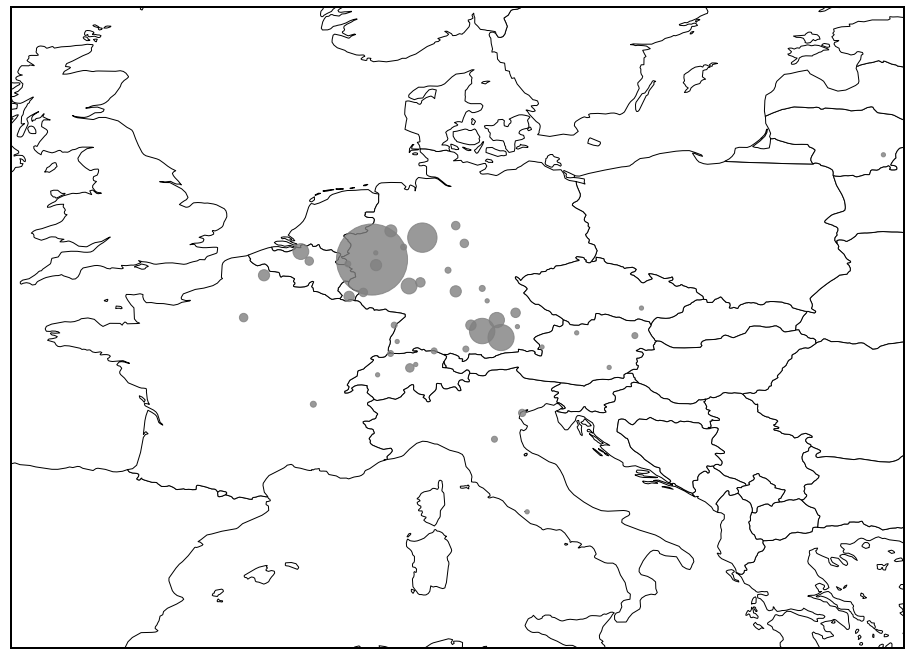

In [85]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Libri Exorcismorum

In [86]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Libri Exorcismorum"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

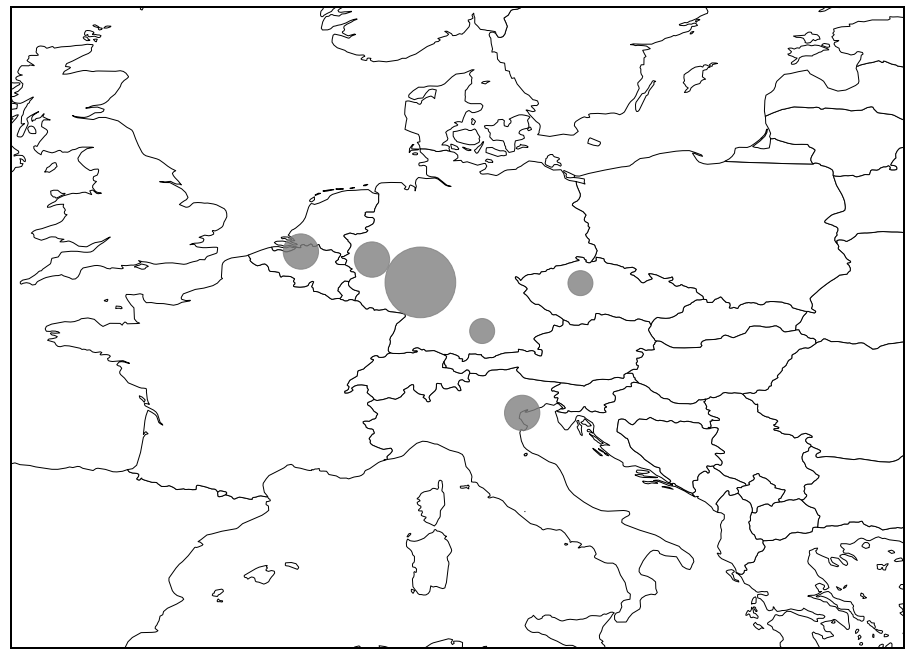

In [87]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Libri Gallici

In [88]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Libri Gallici"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

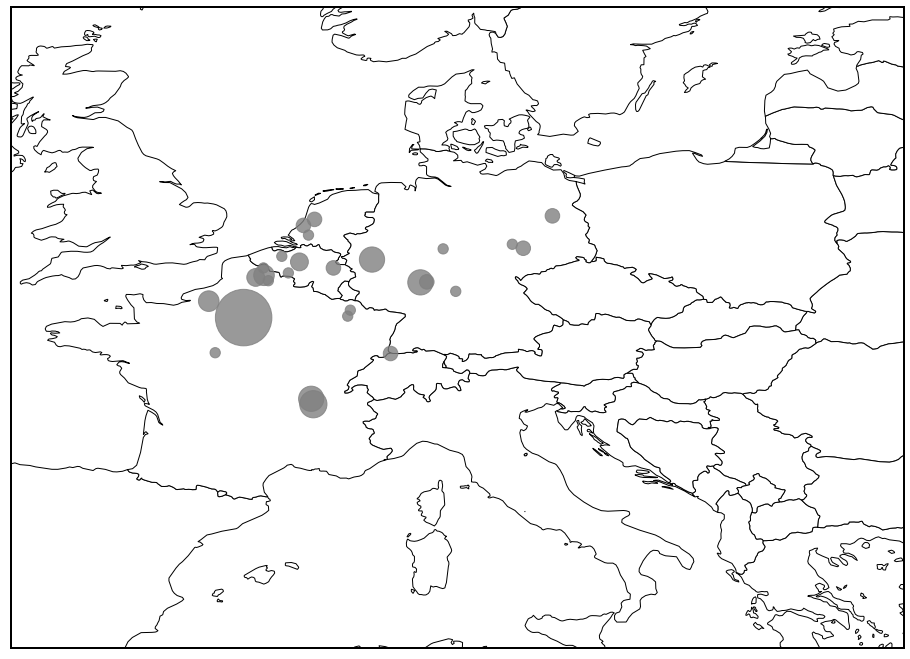

In [89]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Libri Infirmorum

In [90]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Libri Infirmorum"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

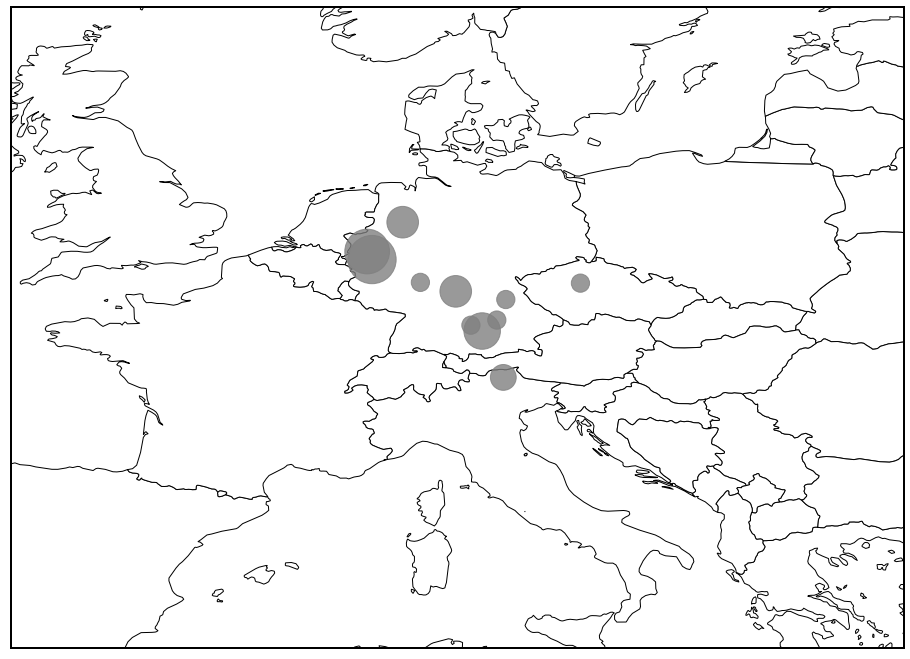

In [91]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Libri Italici, Hispanici & Belgici &c.

In [92]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Libri Italici, Hispanici & Belgici &c."]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

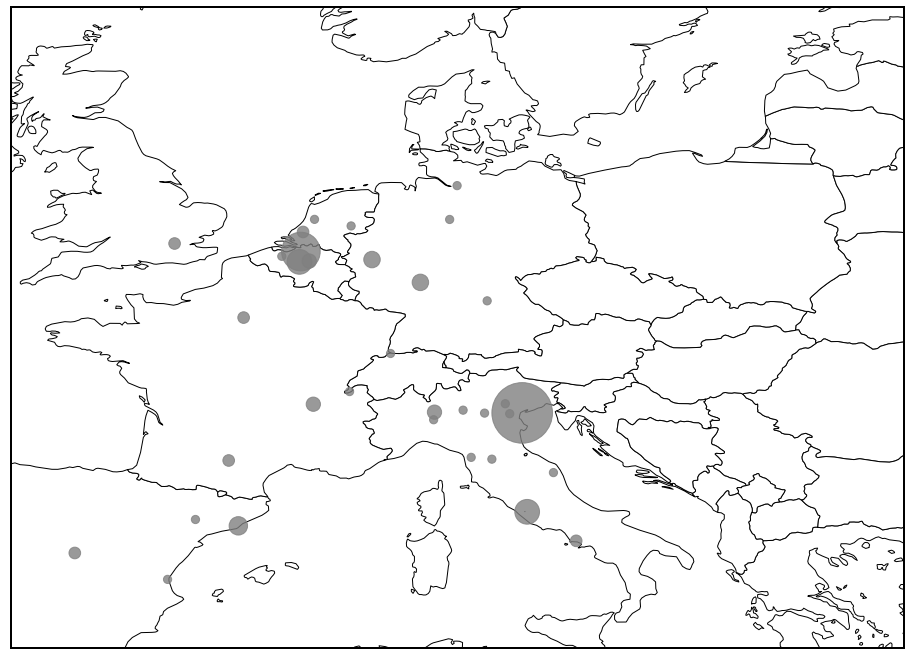

In [93]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Miscellanei

In [94]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Miscellanei"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

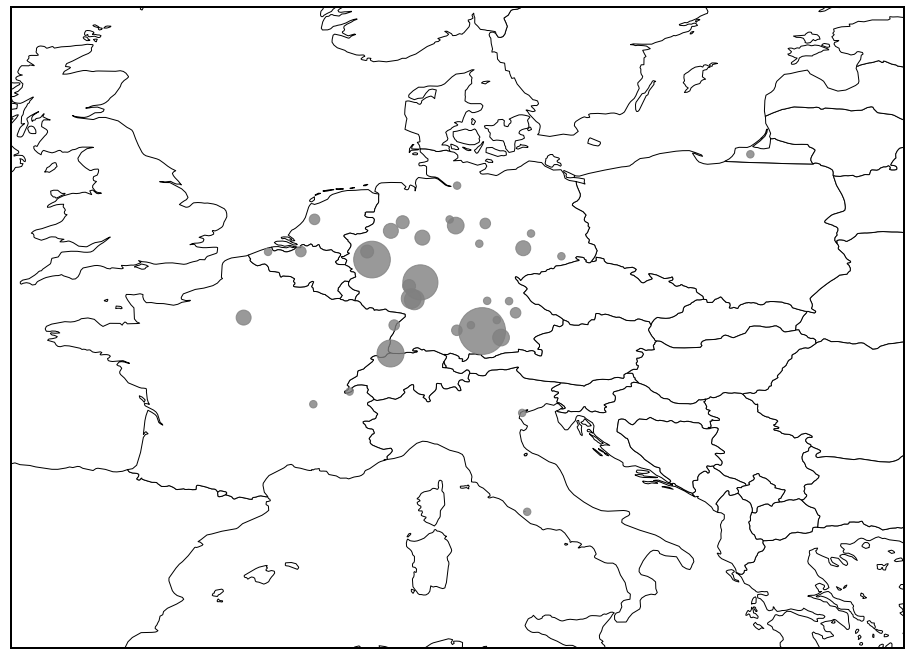

In [95]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Philosophi

In [96]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Philosophi"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

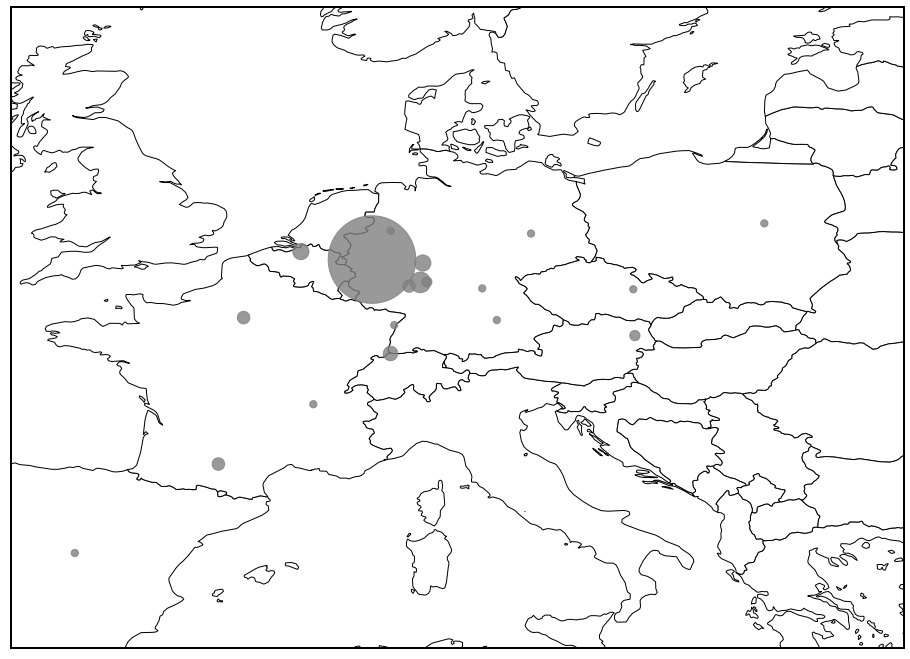

In [97]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Pöetæ

In [98]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Pöetæ"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

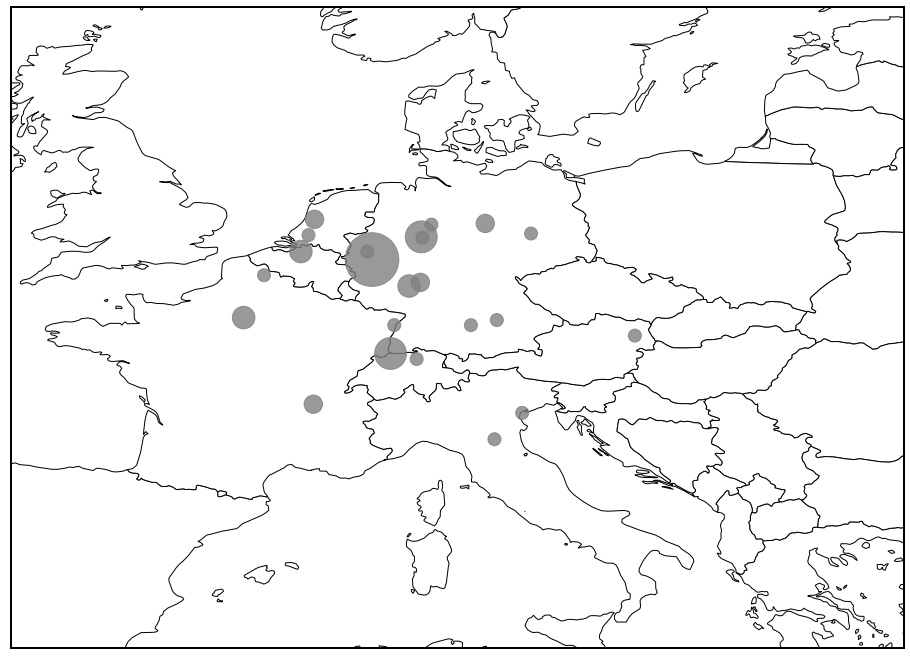

In [99]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Rhetores

In [100]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Rhetores"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

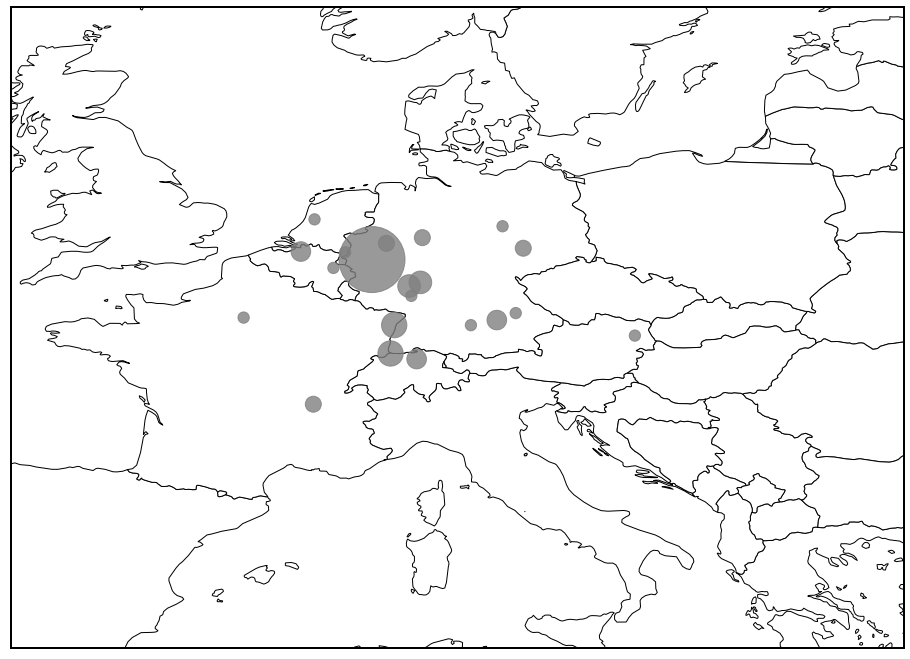

In [101]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Sacra Scriptura

In [102]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Sacra Scriptura"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

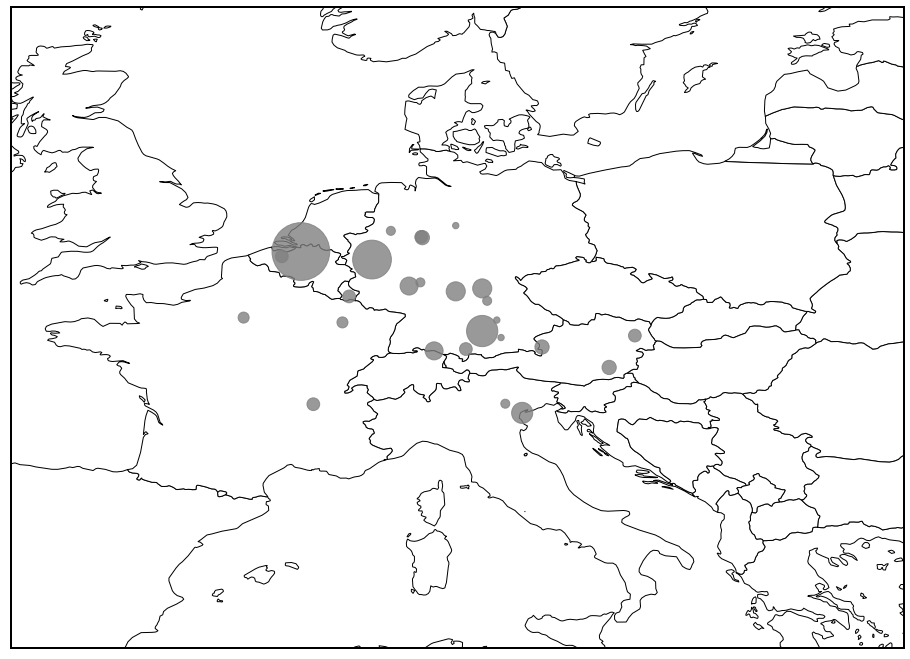

In [103]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Sancti Patres

In [104]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Sancti Patres"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

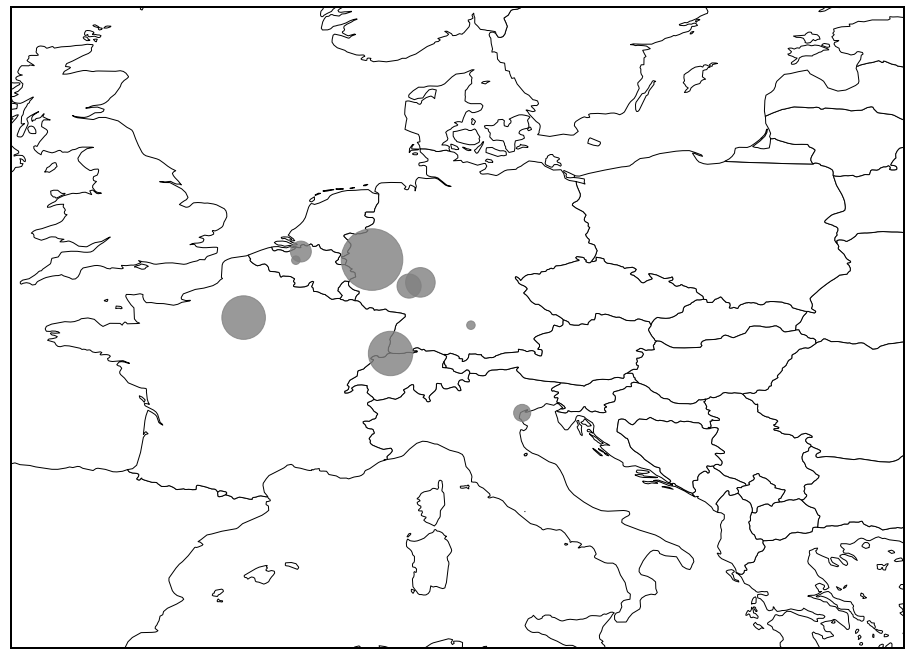

In [105]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Scriptores Ecclesiastici

In [106]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Scriptores Ecclesiastici"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

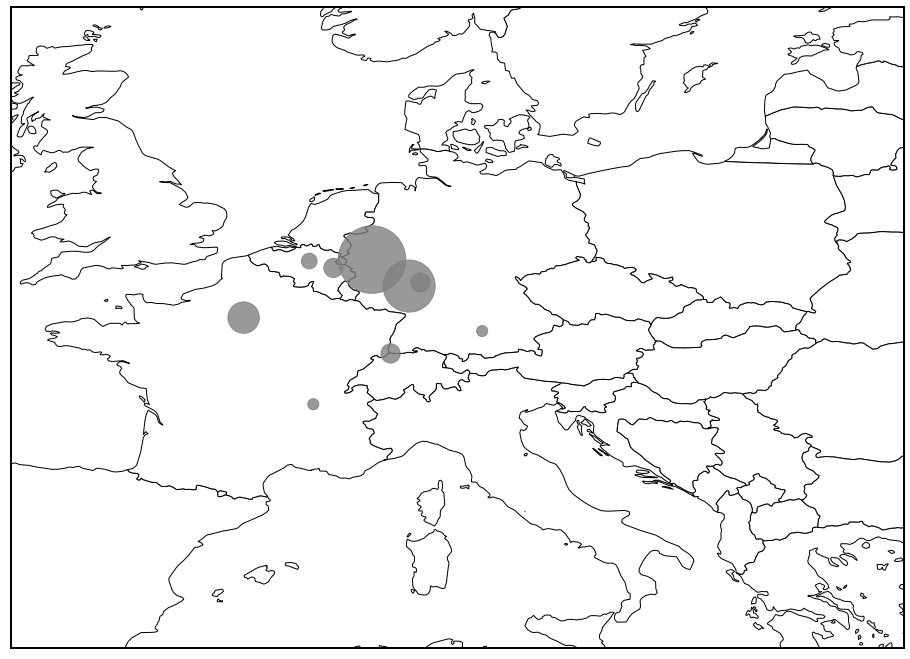

In [107]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Scriptores Ordinum Religiosorum

In [108]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Scriptores Ordinum Religiosorum"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

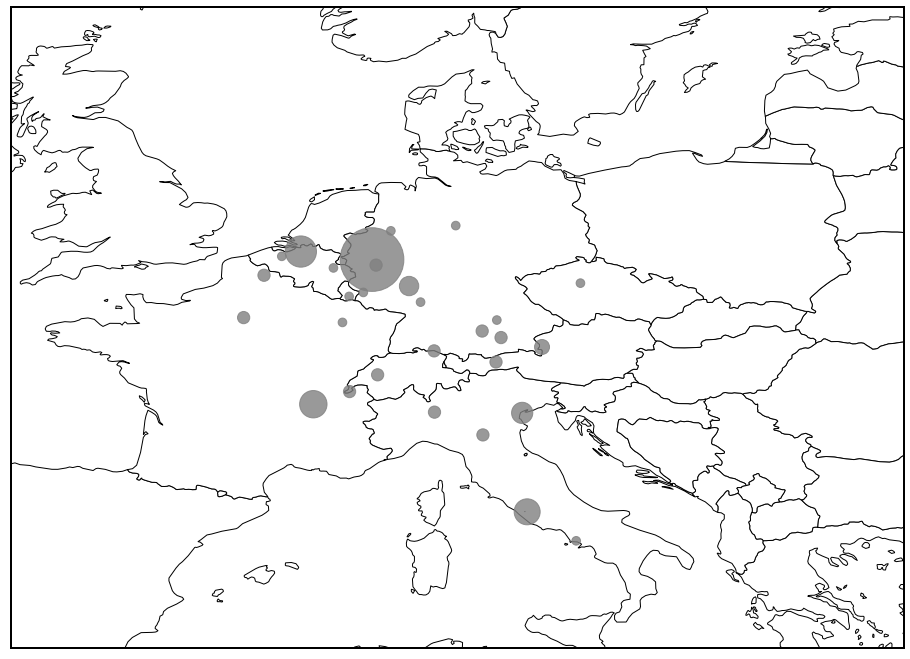

In [109]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

##### Erscheinungsorte auf Karte Theologi

In [110]:
df_books_erscheinungsorte_category = df_books_exploded_erscheinungsorte[df_books_exploded_erscheinungsorte.kategorie=="Theologi"]

df_books_erscheinungsorte_category = df_books_erscheinungsorte_category.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_erscheinungsorte_category.rename("anteil", inplace=True)

df_books_erscheinungsorte_category = pd.merge(df_books_erscheinungsorte_category, df_places, left_index=True, right_index=True)


# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_books_erscheinungsorte_category, geometry=gpd.points_from_xy(df_books_erscheinungsorte_category.koordinaten_lon, df_books_erscheinungsorte_category.koordinaten_lat))

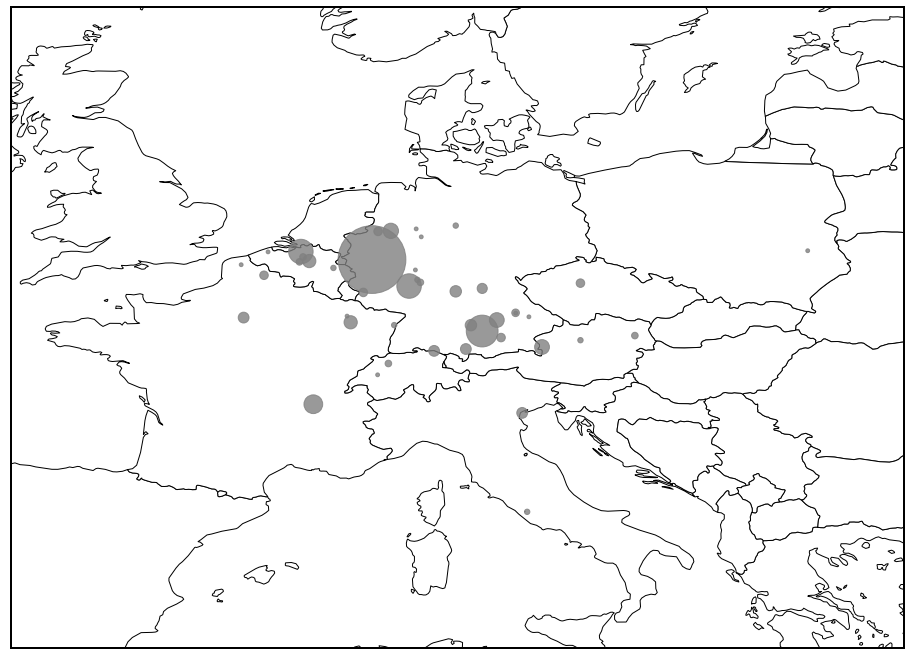

In [111]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

### Sprachen

In [112]:
df_books_languages_exploded = df_books.explode(["sprachen"])
df_books_languages_exploded = df_books_languages_exploded.replace(["deu", "eng", "fre", "ita", "nld", "lat", "gre", "spa", "heb", "por"], ["Deutsch", "Englisch", "Französisch", "Italienisch", "Niederländisch", "Latein", "Altgriechisch", "Spanisch", "Hebräisch", "Portugiesisch"])

df_books_languages_exploded

m_id  s_id authoren_ids sprachen erscheinungsorte_ids  \
id                                                                    
m_00001_a  m_00001  None         None   Latein             pl_00001   
m_00002_a  m_00002  None         None   Latein             pl_00001   
m_00003_a  m_00003  None         None   Latein                 None   
m_00004_a  m_00004  None         None   Latein             pl_00002   
m_00005_a  m_00005  None         None   Latein             pl_00003   
...            ...   ...          ...      ...                  ...   
m_03977_a  m_03977  None         None   Latein             pl_00221   
m_03980_a  m_03980  None     pe_00692   Latein             pl_00002   
m_03985_a  m_03985  None         None  Deutsch             pl_00012   
m_03991_a  m_03991  None     pe_00311  Deutsch             pl_00002   
m_03991_b  m_03991  None     pe_00311  Deutsch             pl_00002   

           erscheinungsjahr  format        kategorie  später_hinzugefügt  \
id                                                                         
m_00001_a            1525.0     2.0  Sacra Scriptura                   0   
m_00002_a            1526.0     2.0  Sacra Scriptura                   0   
m_00003_a               NaN     2.0  Sacra Scriptura                   0   
m_00004_a            1527.0     2.0  Sacra Scriptura                   0   
m_00005_a            1540.0     2.0  Sacra Scriptura                   0   
...                     ...     ...              ...                 ...   
m_03977_a            1786.0     8.0         Theologi                   1   
m_03980_a            1548.0     8.0   Controversistæ                   0   
m_03985_a            1700.0     4.0    Concionatores                   0   
m_03991_a            1660.0     4.0    Concionatores                   0   
m_03991_b            1661.0     4.0    Concionatores                   0   

           später_entfernt  
id                          
m_00001_a                0  
m_00002_a                0  
m_00003_a                0  
m_00004_a                0  
m_00005_a                0  
...                    ...  
m_03977_a                0  
m_03980_a                0  
m_03985_a                0  
m_03991_a                0  
m_03991_b                0  

[5368 rows x 10 columns]

#### Anteil Sprachen

In [113]:
df_books_languages_counted = df_books_languages_exploded["sprachen"].value_counts()
df_books_languages_counted

Latein            3938
Deutsch           1125
Französisch        116
Italienisch        103
Niederländisch      31
Spanisch            28
Altgriechisch       17
Hebräisch            8
Portugiesisch        1
Englisch             1
Name: sprachen, dtype: int64

In [114]:
df_books_languages_anteil = df_books_languages_exploded["sprachen"].value_counts(normalize=True)*100
df_books_languages_anteil

Latein            73.360656
Deutsch           20.957526
Französisch        2.160954
Italienisch        1.918778
Niederländisch     0.577496
Spanisch           0.521610
Altgriechisch      0.316692
Hebräisch          0.149031
Portugiesisch      0.018629
Englisch           0.018629
Name: sprachen, dtype: float64

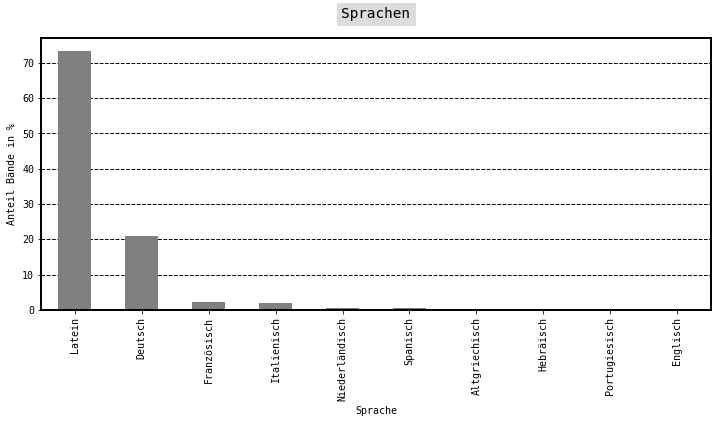

In [115]:
df_books_languages_anteil.plot(kind="bar", figsize=(12,5))
plt.title("Sprachen", backgroundcolor="gainsboro")
plt.ylabel("Anteil Bände in %")
plt.xlabel("Sprache")
plt.grid(axis="y")
plt.show()

#### Anteil nur Fremdsprachen

In [116]:
df_books_languages_fremdsprachen = df_books_languages_exploded[~df_books_languages_exploded.sprachen.isin(["Latein", "Deutsch"])]

df_books_languages_fremdsprachen_anteil = df_books_languages_fremdsprachen["sprachen"].value_counts(normalize=True)*100
df_books_languages_fremdsprachen_anteil

Französisch       38.032787
Italienisch       33.770492
Niederländisch    10.163934
Spanisch           9.180328
Altgriechisch      5.573770
Hebräisch          2.622951
Portugiesisch      0.327869
Englisch           0.327869
Name: sprachen, dtype: float64

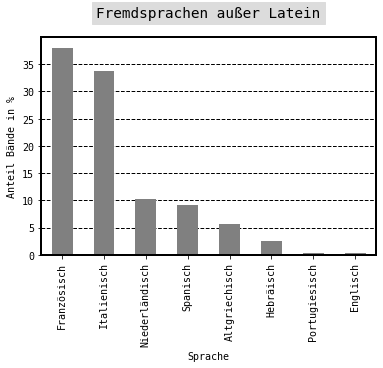

In [117]:
df_books_languages_fremdsprachen_anteil.plot(kind="bar")
plt.title("Fremdsprachen außer Latein", backgroundcolor="gainsboro")
plt.ylabel("Anteil Bände in %")
plt.xlabel("Sprache")
plt.grid(axis="y")
plt.show()

#### Durchschnittliches Erscheinungsjahr pro Sprache

In [118]:
df_languages_erscheinungsjahr_mean = df_books_languages_exploded[["sprachen", "erscheinungsjahr"]]
df_languages_erscheinungsjahr_mean = df_languages_erscheinungsjahr_mean.groupby(by="sprachen").mean()
df_languages_erscheinungsjahr_mean = df_languages_erscheinungsjahr_mean.squeeze()
df_languages_erscheinungsjahr_mean = df_languages_erscheinungsjahr_mean.append(pd.Series([df_books_erscheinungsjahre.mean()], index=["Alle"]))
df_languages_erscheinungsjahr_mean = df_languages_erscheinungsjahr_mean.sort_values(ascending=False)
df_languages_erscheinungsjahr_mean


<ipython-input-118-5700df8d9ebb>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_languages_erscheinungsjahr_mean = df_languages_erscheinungsjahr_mean.append(pd.Series([df_books_erscheinungsjahre.mean()], index=["Alle"]))


Deutsch           1702.072917
Alle              1666.822702
Latein            1659.360360
Französisch       1639.796117
Niederländisch    1633.045455
Italienisch       1632.960000
Englisch          1611.000000
Portugiesisch     1609.000000
Spanisch          1608.296296
Hebräisch         1598.857143
Altgriechisch     1597.400000
dtype: float64

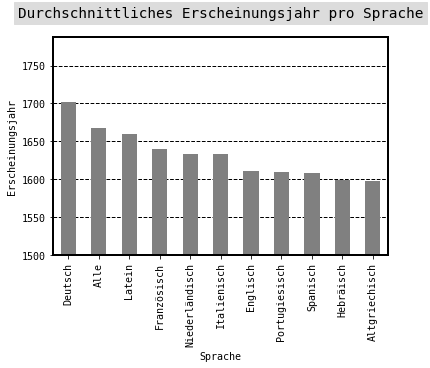

In [119]:
df_languages_erscheinungsjahr_mean.plot(kind="bar")
plt.ylim(ymin=1500)  
plt.title("Durchschnittliches Erscheinungsjahr pro Sprache", backgroundcolor="gainsboro")
plt.ylabel("Erscheinungsjahr")
plt.xlabel("Sprache")
plt.grid(axis="y")
plt.show()

#### Anteil Sprachen bei den Hinzugefügten

In [120]:
df_books_languages_exploded_hinzugefügt = df_books_languages_exploded[df_books_languages_exploded["später_hinzugefügt"] == 1]

df_books_languages_hinzugefügt_counted = df_books_languages_exploded_hinzugefügt["sprachen"].value_counts()
df_books_languages_hinzugefügt_counted

Latein         336
Deutsch        248
Französisch      1
Name: sprachen, dtype: int64

#### Wo wurden die Sprachen gedruckt?

In [121]:
df_books_languages_places_exploded = df_books_languages_exploded.explode(["erscheinungsorte_ids"])

##### Französisch

In [122]:
df_books_französisch = df_books_languages_places_exploded[df_books_languages_places_exploded["sprachen"] == "Französisch"]


df_books_anteil_französisch = df_books_französisch.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_anteil_französisch.rename("anteil", inplace=True)

df_französisch_merged = pd.merge(df_books_anteil_französisch, df_places, left_index=True, right_index=True)
df_französisch_merged.head(20)

anteil               name  koordinaten_lat  koordinaten_lon  \
pl_00004  29.126214              Paris         48.85341          2.34880   
pl_00001   7.766990               Lyon         45.74846          4.84671   
pl_00015   7.766990  Frankfurt am Main         50.11552          8.68417   
pl_00184   5.825243            Trévoux         45.94281          4.77143   
pl_00002   5.825243               Köln         50.93333          6.95000   
pl_00055   3.883495              Rouen         49.44313          1.09932   
pl_00054   3.883495            Brüssel         50.85045          4.34878   
pl_00047   3.883495              Douai         50.37069          3.07922   
pl_00181   2.912621              Arras         50.29301          2.78186   
pl_00074   1.941748            Leipzig         51.33962         12.37129   
pl_00096   1.941748              Hanau         50.13423          8.91418   
pl_00179   1.941748             Berlin         52.50000         13.41667   
pl_00178   1.941748             Leiden         52.15833          4.49306   
pl_00036   1.941748              Basel         47.56690          7.61519   
pl_00078   1.941748          Amsterdam         52.37403          4.88969   
pl_00019   1.941748            Lüttich         50.63373          5.56749   
pl_00003   1.941748          Antwerpen         51.22047          4.40026   
pl_00185   0.970874              Blois         47.59432          1.32912   
pl_00189   0.970874            Mousson         48.90528          6.07917   
pl_00016   0.970874            Venedig         45.43713         12.33265   

                 land  
pl_00004   Frankreich  
pl_00001   Frankreich  
pl_00015  Deutschland  
pl_00184   Frankreich  
pl_00002  Deutschland  
pl_00055   Frankreich  
pl_00054      Belgien  
pl_00047   Frankreich  
pl_00181   Frankreich  
pl_00074  Deutschland  
pl_00096  Deutschland  
pl_00179  Deutschland  
pl_00178  Niederlande  
pl_00036      Schweiz  
pl_00078  Niederlande  
pl_00019      Belgien  
pl_00003      Belgien  
pl_00185   Frankreich  
pl_00189   Frankreich  
pl_00016      Italien

In [123]:
# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_französisch_merged, geometry=gpd.points_from_xy(df_französisch_merged.koordinaten_lon, df_französisch_merged.koordinaten_lat))

<function matplotlib.pyplot.show(close=None, block=None)>

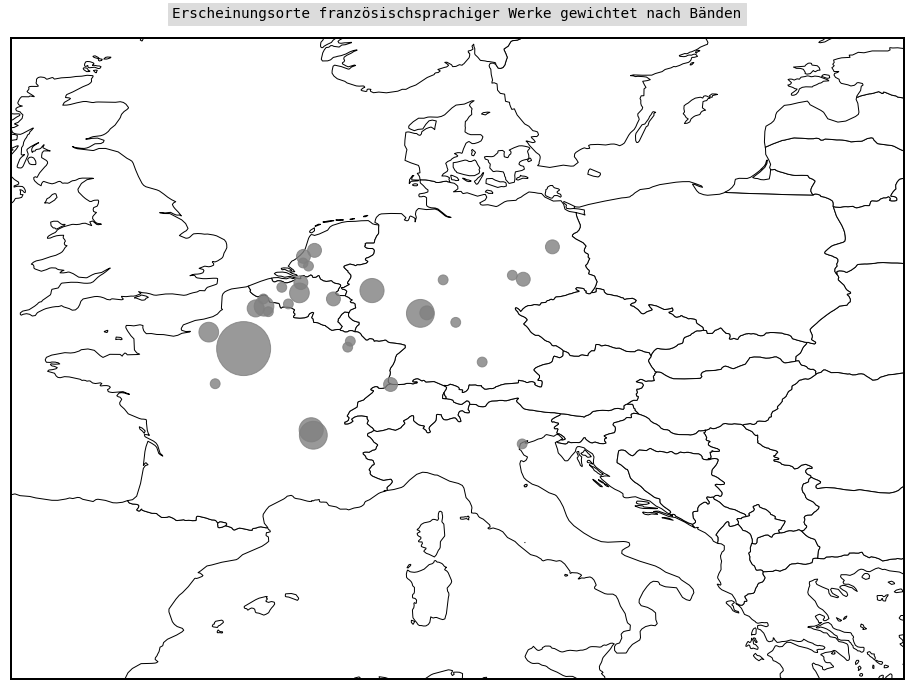

In [124]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.title("Erscheinungsorte französischsprachiger Werke gewichtet nach Bänden", backgroundcolor="gainsboro")
plt.show

##### Italienisch

In [125]:
df_books_italienisch = df_books_languages_places_exploded[df_books_languages_places_exploded["sprachen"] == "Italienisch"]


df_books_anteil_italienisch = df_books_italienisch.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_anteil_italienisch.rename("anteil", inplace=True)

df_italienisch_merged = pd.merge(df_books_anteil_italienisch, df_places, left_index=True, right_index=True)
df_italienisch_merged.head(10)

anteil               name  koordinaten_lat  koordinaten_lon  \
pl_00016  55.102041            Venedig         45.43713         12.33265   
pl_00043   9.183673                Rom         41.89193         12.51133   
pl_00015   6.122449  Frankfurt am Main         50.11552          8.68417   
pl_00044   3.061224            Mailand         45.46427          9.18951   
pl_00003   3.061224          Antwerpen         51.22047          4.40026   
pl_00001   3.061224               Lyon         45.74846          4.84671   
pl_00045   2.040816             Napoli         40.85216         14.26811   
pl_00002   2.040816               Köln         50.93333          6.95000   
pl_00202   1.020408              Lucca         43.84369         10.50447   
pl_00215   1.020408           Macerata         43.29789         13.45293   

                 land  
pl_00016      Italien  
pl_00043      Italien  
pl_00015  Deutschland  
pl_00044      Italien  
pl_00003      Belgien  
pl_00001   Frankreich  
pl_00045      Italien  
pl_00002  Deutschland  
pl_00202      Italien  
pl_00215      Italien

In [126]:
# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_italienisch_merged, geometry=gpd.points_from_xy(df_italienisch_merged.koordinaten_lon, df_italienisch_merged.koordinaten_lat))

<function matplotlib.pyplot.show(close=None, block=None)>

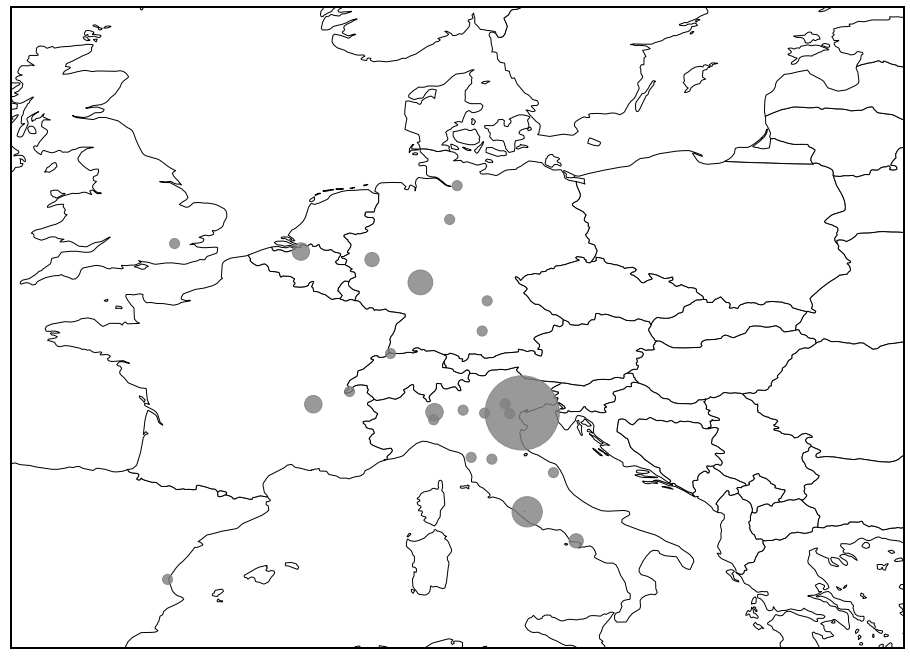

In [127]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show

##### Deutsch

In [128]:
df_books_deutsch = df_books_languages_places_exploded[df_books_languages_places_exploded["sprachen"] == "Deutsch"]


df_books_anteil_deutsch = df_books_deutsch.erscheinungsorte_ids.value_counts(normalize=True)*100
df_books_anteil_deutsch.rename("anteil", inplace=True)

df_deutsch_merged = pd.merge(df_books_anteil_deutsch, df_places, left_index=True, right_index=True)
df_deutsch_merged.head(10)

anteil               name  koordinaten_lat  koordinaten_lon  \
pl_00006  21.719858           Augsburg         48.37154         10.89851   
pl_00002  18.173759               Köln         50.93333          6.95000   
pl_00020   5.319149            München         48.13743         11.57549   
pl_00009   4.343972              Mainz         49.98419          8.27910   
pl_00005   3.989362           Würzburg         49.79391          9.95121   
pl_00027   3.723404          Paderborn         51.71905          8.75439   
pl_00012   2.925532           Nürnberg         49.45421         11.07752   
pl_00015   2.836879  Frankfurt am Main         50.11552          8.68417   
pl_00014   2.393617           Salzburg         47.79941         13.04399   
pl_00011   2.127660               Wien         48.20820         16.37169   

                 land  
pl_00006  Deutschland  
pl_00002  Deutschland  
pl_00020  Deutschland  
pl_00009  Deutschland  
pl_00005  Deutschland  
pl_00027  Deutschland  
pl_00012  Deutschland  
pl_00015  Deutschland  
pl_00014   Österreich  
pl_00011   Österreich

In [129]:
# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_deutsch_merged, geometry=gpd.points_from_xy(df_deutsch_merged.koordinaten_lon, df_deutsch_merged.koordinaten_lat))

<function matplotlib.pyplot.show(close=None, block=None)>

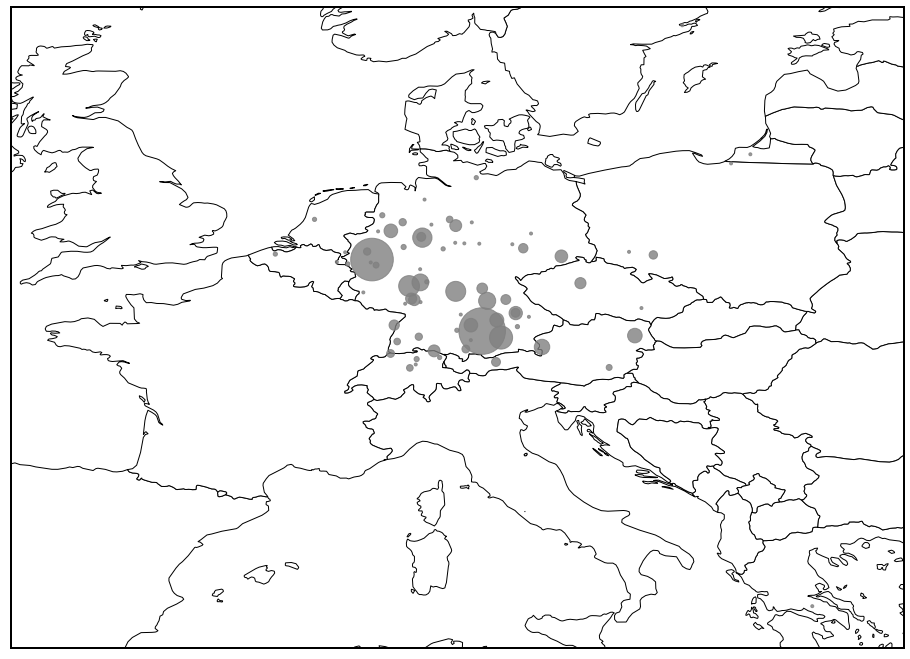

In [130]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-6, 26)
ax.set_ylim(37, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show

### Autoren

In [131]:
df_books_authors_exploded = df_books.explode(column="authoren_ids")
df_books_authors_merged = pd.merge(df_books_authors_exploded, df_persons, left_on="authoren_ids", right_index=True)
df_books_authors_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4544 entries, m_00009_a to m_03953_a
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m_id                  4544 non-null   object 
 1   s_id                  2030 non-null   object 
 2   authoren_ids          4544 non-null   object 
 3   sprachen              4544 non-null   object 
 4   erscheinungsorte_ids  4345 non-null   object 
 5   erscheinungsjahr      4326 non-null   float64
 6   format                4517 non-null   float64
 7   kategorie             4544 non-null   object 
 8   später_hinzugefügt    4544 non-null   int64  
 9   später_entfernt       4544 non-null   int64  
 10  name                  4544 non-null   object 
 11  geschlecht            3712 non-null   object 
 12  geburtsort_id         3149 non-null   object 
 13  geburtsjahr_min       3698 non-null   float64
 14  geburtsjahr_max       3698 non-null   float64
 15  sterbeort_id 

In [132]:

df_books_authors_birthplace_merged = pd.merge(df_books_authors_merged, df_places, left_on="geburtsort_id", right_index=True)
df_books_authors_birthplace_merged.head(5)

m_id  s_id authoren_ids         sprachen erscheinungsorte_ids  \
id                                                                            
m_00009_a  m_00009  None     pe_00001  [lat, heb, gre]             pl_00004   
m_00010_a  m_00010  None     pe_00002              deu             pl_00002   
m_00011_a  m_00011  None     pe_00002              deu             pl_00002   
m_00016_a  m_00016  None     pe_00002              deu             pl_00002   
m_00017_a  m_00017  None     pe_00002              deu             pl_00005   

           erscheinungsjahr  format        kategorie  später_hinzugefügt  \
id                                                                         
m_00009_a            1565.0     2.0  Sacra Scriptura                   0   
m_00010_a            1587.0     2.0  Sacra Scriptura                   0   
m_00011_a            1598.0     2.0  Sacra Scriptura                   0   
m_00016_a            1692.0     2.0  Sacra Scriptura                   0   
m_00017_a            1705.0     2.0  Sacra Scriptura                   0   

           später_entfernt  ... geburtsjahr_max sterbeort_id sterbejahr_min  \
id                          ...                                               
m_00009_a                0  ...          1484.0     pl_00004         1573.0   
m_00010_a                0  ...          1475.0     pl_00009         1537.0   
m_00011_a                0  ...          1475.0     pl_00009         1537.0   
m_00016_a                0  ...          1475.0     pl_00009         1537.0   
m_00017_a                0  ...          1475.0     pl_00009         1537.0   

           sterbejahr_max  organisation_id                      glaube  \
id                                                                       
m_00009_a          1573.0             None  römisch-katholische Kirche   
m_00010_a          1537.0        org_00006  römisch-katholische Kirche   
m_00011_a          1537.0        org_00006  römisch-katholische Kirche   
m_00016_a          1537.0        org_00006  römisch-katholische Kirche   
m_00017_a          1537.0        org_00006  römisch-katholische Kirche   

                      name_y  koordinaten_lat koordinaten_lon         land  
id                                                                          
m_00009_a  Verneuil-sur-Avre         48.73949         0.92731   Frankreich  
m_00010_a  Frankfurt am Main         50.11552         8.68417  Deutschland  
m_00011_a  Frankfurt am Main         50.11552         8.68417  Deutschland  
m_00016_a  Frankfurt am Main         50.11552         8.68417  Deutschland  
m_00017_a  Frankfurt am Main         50.11552         8.68417  Deutschland  

[5 rows x 24 columns]

#### Anteil der heutigen Geburtsländer der Autoren

In [133]:
df_birthplace_anteil = df_books_authors_birthplace_merged.land.value_counts(normalize=True)*100
df_birthplace_anteil.head(10)

Deutschland    34.677675
Italien        18.577326
Frankreich     12.226104
Spanien         9.368053
Belgien         6.478247
Niederlande     4.191807
Österreich      2.127660
Luxemburg       1.492537
Portugal        1.270245
Algerien        1.206732
Name: land, dtype: float64

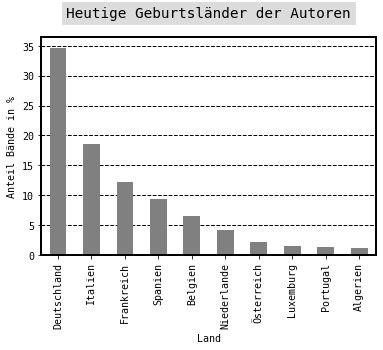

In [134]:
df_birthplace_anteil.head(10).plot(kind="bar")
plt.title("Heutige Geburtsländer der Autoren", backgroundcolor="gainsboro")
plt.ylabel("Anteil Bände in %")
plt.xlabel("Land")
plt.grid(axis="y")
plt.show()

#### Abstand Geburtsorte zu Paderborn

In [135]:

geburtsorte = df_books_authors_birthplace_merged.geburtsort_id.unique()

df_distanceToPaderborn_geburtsorte = df_distanceToPaderborn_merged[df_distanceToPaderborn_merged.index.isin(geburtsorte)]
df_distanceToPaderborn_geburtsorte = df_distanceToPaderborn_geburtsorte.set_index("name")
df_distanceToPaderborn_geburtsorte = df_distanceToPaderborn_geburtsorte.sort_values(by=["abstand_zu_paderborn"], ascending=False)
df_distanceToPaderborn_geburtsorte.head(10)


abstand_zu_paderborn  koordinaten_lat  koordinaten_lon  \
name                                                                        
Aelia Capitolina            3088.341131        31.775689        35.231040   
Jerusalem                   3088.112629        31.769040        35.216330   
Eleutheropolis              3084.857142        31.607110        34.897150   
Nusaybin                    3012.657072        37.070280        41.214650   
Caesarea Maritima           3004.605416        32.500820        34.892280   
Damaskus                    2996.656710        33.510200        36.291280   
Syrien                      2973.600812        35.000000        38.000000   
Mahalla al-Kubra            2945.445741        30.970630        31.166900   
Alexandria                  2861.289515        31.201760        29.915820   
Edessa                      2850.914200        37.145656        38.783961   

                      land  
name                        
Aelia Capitolina    Israel  
Jerusalem           Israel  
Eleutheropolis      Israel  
Nusaybin            Türkei  
Caesarea Maritima   Israel  
Damaskus            Syrien  
Syrien              Syrien  
Mahalla al-Kubra   Ägypten  
Alexandria         Ägypten  
Edessa              Türkei

#### Geburtsorte auf Karte

In [136]:
df_birthplace_anteil = df_books_authors_birthplace_merged.geburtsort_id.value_counts(normalize=True)*100
df_birthplace_anteil.rename("anteil", inplace=True)
df_birthplace_anteil.head(10)

pl_00605    4.128295
pl_00003    1.651318
pl_00006    1.524293
pl_01001    1.302001
pl_00302    1.206732
pl_00246    1.174976
pl_00140    1.111464
pl_00009    1.016196
pl_00226    0.952683
pl_00355    0.920927
Name: anteil, dtype: float64

In [137]:
df_birthplace_anteil_merged = pd.merge(df_birthplace_anteil, df_places, left_index=True, right_index=True)

In [138]:
# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_birthplace_anteil_merged, geometry=gpd.points_from_xy(df_birthplace_anteil_merged.koordinaten_lon, df_birthplace_anteil_merged.koordinaten_lat))

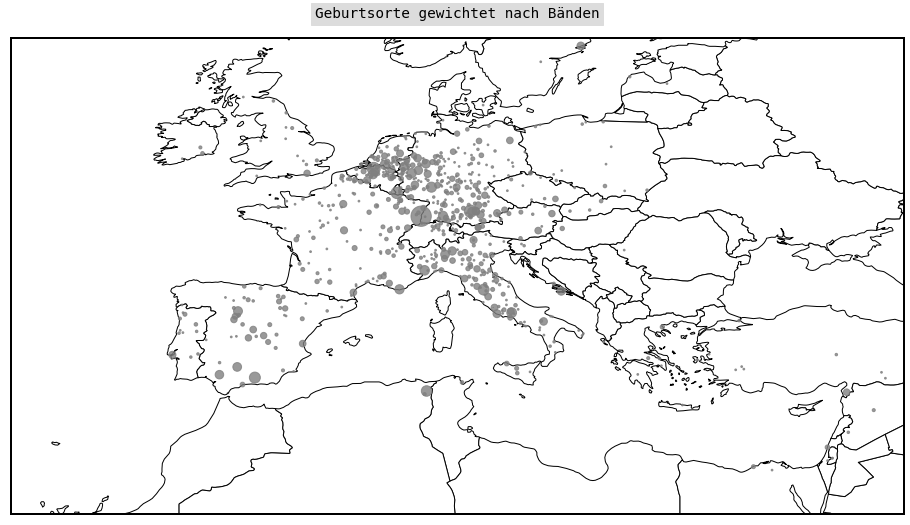

In [139]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-20, 40)
ax.set_ylim(28, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.title("Geburtsorte gewichtet nach Bänden", backgroundcolor="gainsboro")
plt.show()

In [140]:
df_books_authors_deathplace_merged = pd.merge(df_books_authors_merged, df_places, left_on="sterbeort_id", right_index=True)
df_books_authors_deathplace_merged.head(5)

m_id     s_id authoren_ids         sprachen  \
id                                                          
m_00009_a  m_00009     None     pe_00001  [lat, heb, gre]   
m_00362_a  m_00362  s_00044     pe_00049              lat   
m_00363_a  m_00363  s_00044     pe_00049              lat   
m_00364_a  m_00364  s_00044     pe_00049              lat   
m_00464_a  m_00464  s_00055     pe_00087              lat   

          erscheinungsorte_ids  erscheinungsjahr  format  \
id                                                         
m_00009_a             pl_00004            1565.0     2.0   
m_00362_a             pl_00009            1617.0     2.0   
m_00363_a             pl_00009            1617.0     2.0   
m_00364_a             pl_00009            1617.0     2.0   
m_00464_a             pl_00004            1641.0     8.0   

                          kategorie  später_hinzugefügt  später_entfernt  ...  \
id                                                                        ...   
m_00009_a           Sacra Scriptura                   0                0  ...   
m_00362_a             Sancti Patres                   0                0  ...   
m_00363_a             Sancti Patres                   0                0  ...   
m_00364_a             Sancti Patres                   0                0  ...   
m_00464_a  Scriptores Ecclesiastici                   0                0  ...   

          geburtsjahr_max sterbeort_id sterbejahr_min  sterbejahr_max  \
id                                                                      
m_00009_a          1484.0     pl_00004         1573.0          1573.0   
m_00362_a          1096.0     pl_00004         1141.0          1141.0   
m_00363_a          1096.0     pl_00004         1141.0          1141.0   
m_00364_a          1096.0     pl_00004         1141.0          1141.0   
m_00464_a          1583.0     pl_00004         1652.0          1652.0   

           organisation_id                      glaube  name_y  \
id                                                               
m_00009_a             None  römisch-katholische Kirche   Paris   
m_00362_a        org_00017                 Christentum   Paris   
m_00363_a        org_00017                 Christentum   Paris   
m_00364_a        org_00017                 Christentum   Paris   
m_00464_a        org_00007  römisch-katholische Kirche   Paris   

           koordinaten_lat koordinaten_lon        land  
id                                                      
m_00009_a         48.85341          2.3488  Frankreich  
m_00362_a         48.85341          2.3488  Frankreich  
m_00363_a         48.85341          2.3488  Frankreich  
m_00364_a         48.85341          2.3488  Frankreich  
m_00464_a         48.85341          2.3488  Frankreich  

[5 rows x 24 columns]

#### Anteil der heutigen Sterbeländer der Autoren

In [141]:
df_deathplace_anteil = df_books_authors_deathplace_merged.land.value_counts(normalize=True)*100
df_deathplace_anteil.head(10)

Deutschland    28.246412
Italien        23.101155
Frankreich     13.090655
Belgien         6.685334
Österreich      6.125306
Spanien         5.845292
Schweiz         5.705285
Portugal        1.750088
Niederlande     1.645082
Algerien        1.225061
Name: land, dtype: float64

#### Abstand Sterbeorte zu Paderborn

In [142]:
sterbeorte = df_books_authors_deathplace_merged.sterbeort_id.unique()

df_distanceToPaderborn_sterbeorte = df_distanceToPaderborn_merged[df_distanceToPaderborn_merged.index.isin(sterbeorte)]
df_distanceToPaderborn_sterbeorte = df_distanceToPaderborn_sterbeorte.set_index("name")
df_distanceToPaderborn_sterbeorte = df_distanceToPaderborn_sterbeorte.sort_values(by=["abstand_zu_paderborn"], ascending=False)
df_distanceToPaderborn_sterbeorte.head(10)

abstand_zu_paderborn  koordinaten_lat  koordinaten_lon  \
name                                                                        
Potosí                     10691.865035       -19.583610       -65.753060   
Shimabara                   9035.205602        32.783330       130.366670   
Nagasaki                    9008.315318        32.782060       129.827150   
Hangzhou                    8719.971557        30.293650       120.161420   
Salvador da Bahía           8506.169921       -12.971110       -38.510830   
Belém                       7965.848044        -1.455830       -48.504440   
Punnaikayal                 7839.658863         8.632222        78.111944   
Peking                      7664.225402        39.907500       116.397230   
Sinai                       3318.382949        28.539140        33.974960   
Telde                       3318.070760        27.977800       -15.413670   

                        land  
name                          
Potosí              Bolivien  
Shimabara              Japan  
Nagasaki               Japan  
Hangzhou               China  
Salvador da Bahía  Brasilien  
Belém              Brasilien  
Punnaikayal           Indien  
Peking                 China  
Sinai                Ägypten  
Telde                Spanien

#### Sterbeorte auf Karte

In [143]:
df_deathplace_anteil = df_books_authors_deathplace_merged.sterbeort_id.value_counts(normalize=True)*100
df_deathplace_anteil.rename("anteil", inplace=True)
df_deathplace_anteil.head(10)

pl_00043    11.340567
pl_00004     4.550228
pl_00057     4.550228
pl_00020     3.955198
pl_00011     3.465173
pl_00003     2.485124
pl_00002     2.380119
pl_00041     1.575079
pl_00196     1.470074
pl_00045     1.260063
Name: anteil, dtype: float64

In [144]:
df_deathplace_anteil_merged = pd.merge(df_deathplace_anteil, df_places, left_index=True, right_index=True)

In [145]:
# Erstellen eines GeoDataFrames in dem "geometry" die Punkte mit Koordinaten darstellt
gdf = gpd.GeoDataFrame(
    df_deathplace_anteil_merged, geometry=gpd.points_from_xy(df_deathplace_anteil_merged.koordinaten_lon, df_deathplace_anteil_merged.koordinaten_lat))

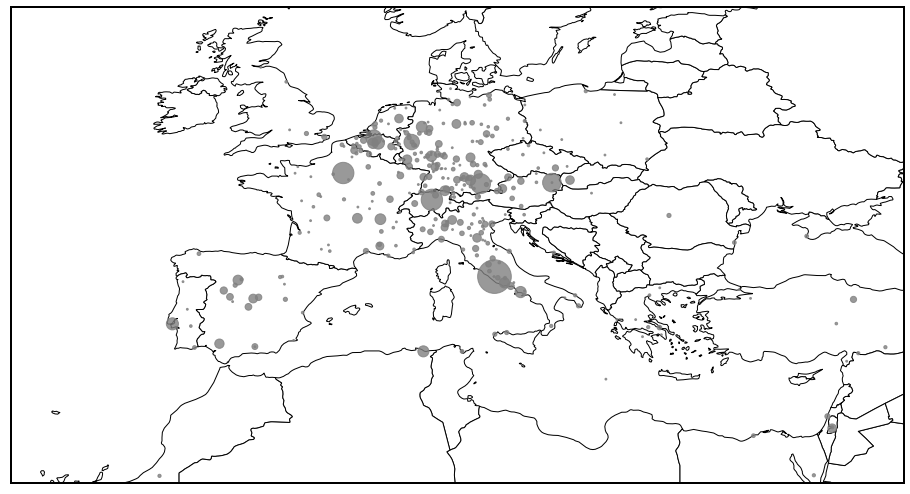

In [146]:
ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black')

ax.set_xlim(-20, 40)
ax.set_ylim(28, 60)

gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

#### Distanz Gebursts- zu Sterbeort

In [147]:
df_persons_sliced = df_persons[["geburtsort_id", "sterbeort_id"]]
df_persons_sliced = df_persons_sliced.dropna()


df_persons_birthplace_merged = pd.merge(df_persons_sliced, df_places, left_on="geburtsort_id", right_index=True)
df_persons_birthplace_deathplace_merged = pd.merge(df_persons_birthplace_merged, df_places, left_on="sterbeort_id", right_index=True, suffixes=("_geburtsort", "_sterbeort"))
df_persons_birthplace_deathplace_merged = df_persons_birthplace_deathplace_merged.dropna(subset=["koordinaten_lat_geburtsort", "koordinaten_lat_sterbeort"])
df_persons_birthplace_deathplace_merged["distance"] = df_persons_birthplace_deathplace_merged.apply(lambda row: distance.great_circle((row.koordinaten_lat_geburtsort, row.koordinaten_lon_geburtsort), (row.koordinaten_lat_sterbeort, row.koordinaten_lon_sterbeort)).km, axis=1)
df_persons_birthplace_deathplace_merged = df_persons_birthplace_deathplace_merged.sort_values(by="distance", ascending=False)

df_persons_birthplace_deathplace_merged.head(15)

geburtsort_id sterbeort_id name_geburtsort  \
id                                                    
pe_00685      pl_00196     pl_00579        Lissabon   
pe_01355      pl_00296     pl_00866         Sevilla   
pe_00224      pl_00299     pl_00339          Toledo   
pe_01217      pl_00047     pl_00776           Douai   
pe_00496      pl_00479     pl_00480     Vila Viçosa   
pe_01285      pl_00215     pl_00827        Macerata   
pe_01082      pl_00196     pl_00733        Lissabon   
pe_01587      pl_00975     pl_00974      Cantanhede   
pe_00066      pl_00236     pl_00043       Jerusalem   
pe_00385      pl_01000     pl_00417       Guimarães   
pe_00047      pl_00210     pl_00212       Dalmatien   
pe_00062      pl_00232     pl_00043            Söra   
pe_00133      pl_00270     pl_00043       Waterford   
pe_01238      pl_00796     pl_00043       Linköping   
pe_00648      pl_00983     pl_00984          Olmedo   

          koordinaten_lat_geburtsort  koordinaten_lon_geburtsort  \
id                                                                 
pe_00685                   38.716670                   -9.133330   
pe_01355                   37.382830                   -5.973170   
pe_00224                   39.858100                   -4.022630   
pe_01217                   50.370690                    3.079220   
pe_00496                   38.775910                   -7.416070   
pe_01285                   43.297890                   13.452930   
pe_01082                   38.716670                   -9.133330   
pe_01587                   40.363540                   -8.605490   
pe_00066                   31.769040                   35.216330   
pe_00385                   41.443840                   -8.289180   
pe_00047                   43.000000                   17.000000   
pe_00062                   59.476139                   18.315056   
pe_00133                   52.258330                   -7.111940   
pe_01238                   58.410860                   15.621570   
pe_00648                   41.301610                   -4.708810   

         land_geburtsort     name_sterbeort  koordinaten_lat_sterbeort  \
id                                                                       
pe_00685        Portugal           Nagasaki                  32.782060   
pe_01355         Spanien          Shimabara                  32.783330   
pe_00224         Spanien             Potosí                 -19.583610   
pe_01217      Frankreich           Hangzhou                  30.293650   
pe_00496        Portugal        Punnaikayal                   8.632222   
pe_01285         Italien             Peking                  39.907500   
pe_01082        Portugal  Salvador da Bahía                 -12.971110   
pe_01587        Portugal              Belém                  -1.455830   
pe_00066          Israel                Rom                  41.891930   
pe_00385        Portugal             Ugento                  39.926320   
pe_00047        Kroatien          Bethlehem                  31.704870   
pe_00062        Schweden                Rom                  41.891930   
pe_00133          Irland                Rom                  41.891930   
pe_01238        Schweden                Rom                  41.891930   
pe_00648         Spanien              Telde                  27.977800   

          koordinaten_lon_sterbeort land_sterbeort      distance  
id                                                                
pe_00685                 129.827150          Japan  11006.300009  
pe_01355                 130.366670          Japan  10996.135608  
pe_00224                 -65.753060       Bolivien   9191.612208  
pe_01217                 120.161420          China   9126.962993  
pe_00496                  78.111944         Indien   9021.877492  
pe_01285                 116.397230          China   7966.510836  
pe_01082                 -38.510830      Brasilien   6507.354190  
pe_01587                 -48.504440      Brasilien   6

In [148]:
df_persons_birthplace_deathplace_merged.tail(5)

geburtsort_id sterbeort_id name_geburtsort  \
id                                                    
pe_00177      pl_00003     pl_00003       Antwerpen   
pe_00546      pl_00054     pl_00054         Brüssel   
pe_00311      pl_00068     pl_00068       Straßburg   
pe_01391      pl_00206     pl_00206          London   
pe_00874      pl_00006     pl_00006        Augsburg   

          koordinaten_lat_geburtsort  koordinaten_lon_geburtsort  \
id                                                                 
pe_00177                    51.22047                     4.40026   
pe_00546                    50.85045                     4.34878   
pe_00311                    48.58392                     7.74553   
pe_01391                    51.50853                    -0.12574   
pe_00874                    48.37154                    10.89851   

                 land_geburtsort name_sterbeort  koordinaten_lat_sterbeort  \
id                                                                           
pe_00177                 Belgien      Antwerpen                   51.22047   
pe_00546                 Belgien        Brüssel                   50.85045   
pe_00311              Frankreich      Straßburg                   48.58392   
pe_01391  Vereinigtes Königreich         London                   51.50853   
pe_00874             Deutschland       Augsburg                   48.37154   

          koordinaten_lon_sterbeort          land_sterbeort  distance  
id                                                                     
pe_00177                    4.40026                 Belgien       0.0  
pe_00546                    4.34878                 Belgien       0.0  
pe_00311                    7.74553              Frankreich       0.0  
pe_01391                   -0.12574  Vereinigtes Königreich       0.0  
pe_00874                   10.89851             Deutschland       0.0

In [149]:
gdf = gpd.GeoDataFrame(
    df_places, geometry=gpd.points_from_xy(df_places.koordinaten_lon, df_places.koordinaten_lat))

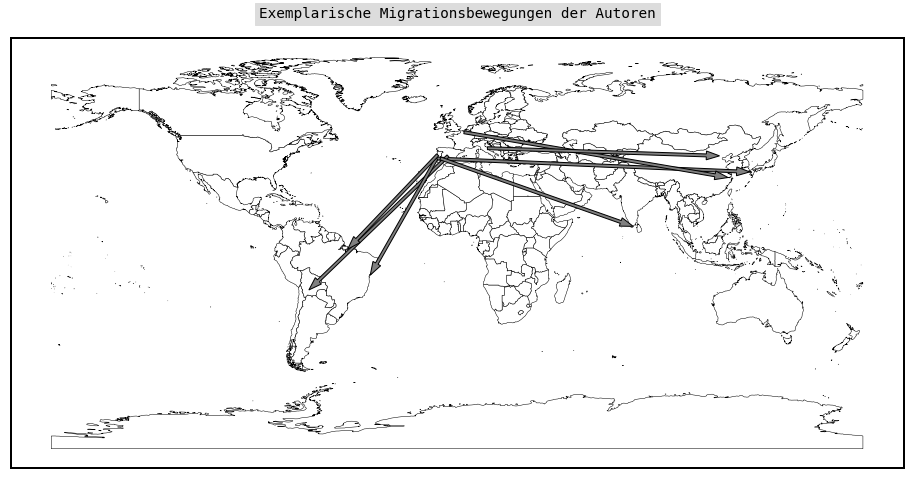

In [150]:
pl_00196_x = float(gdf.loc["pl_00196", "koordinaten_lon"])
pl_00196_y = float(gdf.loc["pl_00196", "koordinaten_lat"])
pl_00579_x = float(gdf.loc["pl_00579", "koordinaten_lon"])
pl_00579_y = float(gdf.loc["pl_00579", "koordinaten_lat"])
pl_00296_x = float(gdf.loc["pl_00296", "koordinaten_lon"])
pl_00296_y = float(gdf.loc["pl_00296", "koordinaten_lat"])
pl_00866_x = float(gdf.loc["pl_00866", "koordinaten_lon"])
pl_00866_y = float(gdf.loc["pl_00866", "koordinaten_lat"])
pl_00299_x = float(gdf.loc["pl_00299", "koordinaten_lon"])
pl_00299_y = float(gdf.loc["pl_00299", "koordinaten_lat"])
pl_00339_x = float(gdf.loc["pl_00339", "koordinaten_lon"])
pl_00339_y = float(gdf.loc["pl_00339", "koordinaten_lat"])
pl_00047_x = float(gdf.loc["pl_00047", "koordinaten_lon"])
pl_00047_y = float(gdf.loc["pl_00047", "koordinaten_lat"])
pl_00776_x = float(gdf.loc["pl_00776", "koordinaten_lon"])
pl_00776_y = float(gdf.loc["pl_00776", "koordinaten_lat"])
pl_00479_x = float(gdf.loc["pl_00479", "koordinaten_lon"])
pl_00479_y = float(gdf.loc["pl_00479", "koordinaten_lat"])
pl_00480_x = float(gdf.loc["pl_00480", "koordinaten_lon"])
pl_00480_y = float(gdf.loc["pl_00480", "koordinaten_lat"])
pl_00215_x = float(gdf.loc["pl_00215", "koordinaten_lon"])
pl_00215_y = float(gdf.loc["pl_00215", "koordinaten_lat"])
pl_00827_x = float(gdf.loc["pl_00827", "koordinaten_lon"])
pl_00827_y = float(gdf.loc["pl_00827", "koordinaten_lat"])
pl_00196_x = float(gdf.loc["pl_00196", "koordinaten_lon"])
pl_00196_y = float(gdf.loc["pl_00196", "koordinaten_lat"])
pl_00733_x = float(gdf.loc["pl_00733", "koordinaten_lon"])
pl_00733_y = float(gdf.loc["pl_00733", "koordinaten_lat"])
pl_00975_x = float(gdf.loc["pl_00975", "koordinaten_lon"])
pl_00975_y = float(gdf.loc["pl_00975", "koordinaten_lat"])
pl_00974_x = float(gdf.loc["pl_00974", "koordinaten_lon"])
pl_00974_y = float(gdf.loc["pl_00974", "koordinaten_lat"])


ax = map_df.plot(figsize=(16,16), color='white', edgecolor='black', linewidth=0.5)

#gdf.plot(ax=ax, color='grey', markersize=gdf["anteil"]*100, alpha=0.8)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# pe_00685
ax.arrow(pl_00196_x, pl_00196_y, (pl_00579_x-pl_00196_x), (pl_00579_y-pl_00196_y), width=1.3, length_includes_head=True)
# pe_00224
ax.arrow(pl_00299_x, pl_00299_y, (pl_00339_x-pl_00299_x), (pl_00339_y-pl_00299_y), width=1.3, length_includes_head=True)
# pe_01217
ax.arrow(pl_00047_x, pl_00047_y, (pl_00776_x-pl_00047_x), (pl_00776_y-pl_00047_y), width=1.3, length_includes_head=True)
# pe_00496
ax.arrow(pl_00479_x, pl_00479_y, (pl_00480_x-pl_00479_x), (pl_00480_y-pl_00479_y), width=1.3, length_includes_head=True)
# pe_01285
ax.arrow(pl_00215_x, pl_00215_y, (pl_00827_x-pl_00215_x), (pl_00827_y-pl_00215_y), width=1.3, length_includes_head=True)
# pe_01082
ax.arrow(pl_00196_x, pl_00196_y, (pl_00733_x-pl_00196_x), (pl_00733_y-pl_00196_y), width=1.3, length_includes_head=True)
# pe_01587
ax.arrow(pl_00975_x, pl_00975_y, (pl_00974_x-pl_00975_x), (pl_00974_y-pl_00975_y), width=1.3, length_includes_head=True)

plt.title("Exemplarische Migrationsbewegungen der Autoren", backgroundcolor="gainsboro")
plt.show()

## Religionen und Konfessionen

In [151]:
protestant_believes = ["Evangelisch-lutherische Kirchen", "Protestantismus", "Anglikanismus", "Calvinismus", "Arminianismus"]
df_persons_believe_exploded = df_persons.explode(column="glaube")
df_books_authors_exploded = df_books.explode(column="authoren_ids")
df_books_authors_merged = pd.merge(df_books_authors_exploded, df_persons_believe_exploded, left_on="authoren_ids", right_index=True)
df_books_authors_merged = df_books_authors_merged[["authoren_ids", "kategorie", "glaube"]]
df_books_authors_merged = df_books_authors_merged[df_books_authors_merged["glaube"].isin(protestant_believes)]
df_books_authors_merged

authoren_ids                    kategorie  \
id                                                    
m_00459_a     pe_00084     Scriptores Ecclesiastici   
m_00748_a     pe_00208  Expositores Sacræ Scripturæ   
m_01793_a     pe_00638               Controversistæ   
m_01794_a     pe_00639               Controversistæ   
m_01978_a     pe_00719                   Philosophi   
m_02007_a     pe_00740                   Philosophi   
m_02012_a     pe_00744                   Philosophi   
m_02021_a     pe_00750                   Philosophi   
m_02037_a     pe_00750                   Philosophi   
m_02072_a     pe_00781                      Juristæ   
m_02179_a     pe_00853                      Juristæ   
m_02907_a     pe_01126                Concionatores   
m_03201_a     pe_01226            Historici Profani   
m_03206_a     pe_01231            Historici Profani   
m_03231_a     pe_01243            Historici Profani   
m_03296_a     pe_01274            Historici Profani   
m_03408_a     pe_01337                  Miscellanei   
m_03409_a     pe_01337                  Miscellanei   
m_03461_a     pe_01367                  Miscellanei   
m_03536_a     pe_01391                  Miscellanei   
m_03547_a     pe_01401                  Miscellanei   
m_03563_a     pe_01407                     Rhetores   
m_03598_a     pe_01407                     Rhetores   
m_03598_a     pe_01407                     Rhetores   
m_03598_a     pe_01407                     Rhetores   
m_03598_a     pe_01407                     Rhetores   
m_03598_a     pe_01407                     Rhetores   
m_03598_b     pe_01407                     Rhetores   
m_03598_c     pe_01407                     Rhetores   
m_03598_d     pe_01407                     Rhetores   
m_03566_a     pe_01409                     Rhetores   
m_03630_a     pe_01443                     Rhetores   
m_03651_a     pe_01457                        Pöetæ   

                                    glaube  
id                                          
m_00459_a  Evangelisch-lutherische Kirchen  
m_00748_a                  Protestantismus  
m_01793_a  Evangelisch-lutherische Kirchen  
m_01794_a                    Anglikanismus  
m_01978_a  Evangelisch-lutherische Kirchen  
m_02007_a                  Protestantismus  
m_02012_a  Evangelisch-lutherische Kirchen  
m_02021_a                      Calvinismus  
m_02037_a                      Calvinismus  
m_02072_a                    Arminianismus  
m_02179_a  Evangelisch-lutherische Kirchen  
m_02907_a  Evangelisch-lutherische Kirchen  
m_03201_a                  Protestantismus  
m_03206_a  Evangelisch-lutherische Kirchen  
m_03231_a                      Calvinismus  
m_03296_a  Evangelisch-lutherische Kirchen  
m_03408_a  Evangelisch-lutherische Kirchen  
m_03409_a  Evangelisch-lutherische Kirchen  
m_03461_a                    Anglikanismus  
m_03536_a                    Anglikanismus  
m_03547_a  Evangelisch-lutherische Kirchen  
m_03563_a                  Protestantismus  
m_03598_a                  Protestantismus  
m_03598_a                  Protestantismus  
m_03598_a                  Protestantismus  
m_03598_a                  Protestantismus  
m_03598_a                  Protestantismus  
m_03598_b                  Protestantismus  
m_03598_c                  Protestantismus  
m_03598_d                  Protestantismus  
m_03566_a                      Calvinismus  
m_03630_a  Evangelisch-lutherische Kirchen  
m_03651_a  Evangelisch-lutherische Kirchen

In [152]:
df_books_authors_counted = df_books_authors_merged.kategorie.value_counts()
df_books_authors_counted

Rhetores                       11
Philosophi                      5
Miscellanei                     5
Historici Profani               4
Controversistæ                  2
Juristæ                         2
Scriptores Ecclesiastici        1
Expositores Sacræ Scripturæ     1
Concionatores                   1
Pöetæ                           1
Name: kategorie, dtype: int64

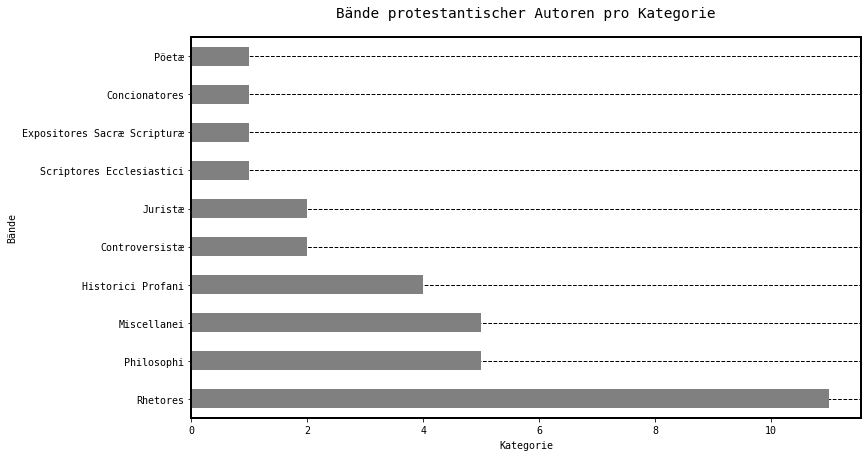

In [153]:
df_books_authors_counted.plot(kind="barh", figsize=(12, 7))
plt.title("Bände protestantischer Autoren pro Kategorie")
plt.ylabel("Bände")
plt.xlabel("Kategorie")
plt.grid(axis="y")
plt.show()

## Orden

In [154]:
df_persons_org_exploded = df_persons.explode(column="organisation_id")
df_books_authors_exploded = df_books.explode(column="authoren_ids")
df_books_authors_merged = pd.merge(df_books_authors_exploded, df_persons_org_exploded, left_on="authoren_ids", right_index=True)
df_books_authors_merged = df_books_authors_merged[["authoren_ids", "kategorie", "organisation_id"]]
df_books_authors_merged = pd.merge(df_books_authors_merged, df_organisations, left_on="organisation_id", right_index=True)
df_books_authors_merged

# 2727 Bände sind von Ordensmitglieder geschrieben, wow!

authoren_ids          kategorie organisation_id             name
id                                                                        
m_00010_a     pe_00002    Sacra Scriptura       org_00006      Dominikaner
m_00011_a     pe_00002    Sacra Scriptura       org_00006      Dominikaner
m_00016_a     pe_00002    Sacra Scriptura       org_00006      Dominikaner
m_00017_a     pe_00002    Sacra Scriptura       org_00006      Dominikaner
m_00033_a     pe_00002    Sacra Scriptura       org_00006      Dominikaner
...                ...                ...             ...              ...
m_02654_b     pe_01044      Concionatores       org_00093          Minimen
m_02654_c     pe_01044      Concionatores       org_00093          Minimen
m_02655_a     pe_01044      Concionatores       org_00093          Minimen
m_02655_b     pe_01044      Concionatores       org_00093          Minimen
m_03252_a     pe_01258  Historici Profani       org_00096  Deutscher Orden

[2727 rows x 4 columns]

In [155]:
df_books_orgs_counted = df_books_authors_merged.name.value_counts()
df_books_orgs_counted

Jesuiten                                                1157
Kapuziner                                                470
Dominikaner                                              231
Franziskaner                                             229
Benediktiner                                             117
Oratorianer                                               77
Karmeliten                                                60
Augustiner                                                50
Zisterzienser                                             49
Augustiner-Eremiten                                       46
Französisches Oratorium                                  37
Feuillanten                                               29
Kartäuser                                                27
Augustiner-Barfüßer                                      27
Augustiner-Chorherren                                     23
Minoriten                                                 13
Unbeschuhte Karmeliten  

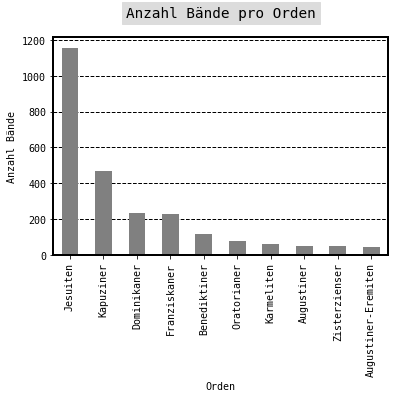

<Figure size 432x288 with 0 Axes>

In [156]:
df_books_orgs_counted.head(10).plot(kind="bar")
plt.title("Anzahl Bände pro Orden", backgroundcolor="gainsboro")
plt.ylabel("Anzahl Bände")
plt.xlabel("Orden")
plt.grid(axis="y")
plt.figure(linewidth=10, edgecolor="black")
plt.show()